<a href="https://colab.research.google.com/github/errortax/Thesis_1/blob/main/Final_4June_thesisUpdate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries and Modules

In [4]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost lightgbm imbalanced-learn shap lime tensorflow keras

In [64]:
# Standard Libraries
import time # Used for timing operations
import re   # Used for cleaning column names
import warnings # Used for managing warnings

# Third-Party Libraries

# Numerical and Data Handling
import numpy as np        # Numerical operations, array handling
import pandas as pd       # Data manipulation and analysis

# Visualization
import matplotlib.pyplot as plt  # Static visualizations
import seaborn as sns           # Statistical visualizations
# import missingno as msno      # Uncomment if you use Missingno

# Machine Learning - Scikit-learn
from sklearn.pipeline import Pipeline          # ML workflows
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, SGDClassifier # Linear models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier # Ensemble methods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # Metrics
# Import the model_selection module
import sklearn.model_selection # Import the module itself
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate # Model selection tools (cross_validate is already imported here, but the NameError suggests model_selection was not)
from sklearn.experimental import enable_iterative_imputer # Experimental imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer # Imputers
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder # Preprocessing tools
from sklearn.compose import ColumnTransformer # Column transformations
from sklearn.inspection import permutation_importance # Permutation importance for XAI


# Machine Learning - Other Libraries
from xgboost import XGBClassifier # XGBoost
from lightgbm import LGBMClassifier # LightGBM (Make sure it's installed: !pip install lightgbm)
from imblearn.over_sampling import SMOTE # For handling class imbalance (Make sure it's installed: !pip install imbalanced-learn)
import shap # For SHAP values (Make sure it's installed: !pip install shap)
from lime import lime_tabular # For LIME explanations (Make sure it's installed: !pip install lime)


# TensorFlow and Keras (for LSTM/GRU)
from tensorflow.keras.models import Sequential # Sequential model API
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout # Layers
from tensorflow.keras.optimizers import Adam # Optimizer
from tensorflow.keras.callbacks import EarlyStopping # Callbacks

# IPython (for notebook specific features like display)
from IPython.display import display
from IPython import get_ipython

# Configuration and Settings
warnings.filterwarnings('ignore')  # Suppresses warnings

pd.set_option('display.max_columns',None) # Pandas display option

In [59]:
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

##Read and Explore the dataset

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name = 'E Comm')

In [8]:
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [9]:
df.shape

(5630, 20)

In [10]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   8 non-null      float64
 1   Churn                        8 non-null      float64
 2   Tenure                       8 non-null      float64
 3   CityTier                     8 non-null      float64
 4   WarehouseToHome              8 non-null      float64
 5   HourSpendOnApp               8 non-null      float64
 6   NumberOfDeviceRegistered     8 non-null      float64
 7   SatisfactionScore            8 non-null      float64
 8   NumberOfAddress              8 non-null      float64
 9   Complain                     8 non-null      float64
 10  OrderAmountHikeFromlastYear  8 non-null      float64
 11  CouponUsed                   8 non-null      float64
 12  OrderCount                   8 non-null      float64
 13  DaySinceLastOrder      

In [11]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [13]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

Dropping Id column

In [16]:
df.drop(columns="CustomerID", inplace=True)

In [17]:
#check column names
df.columns


Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [18]:
# Change column names to lowercase
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['churn', 'tenure', 'preferredlogindevice', 'citytier',
       'warehousetohome', 'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain',
       'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount'],
      dtype='object')

##Create Plot : Uni variant analysis


In [19]:
# segment the columns of the DataFrame into two lists based on the number of unique values each column contains.
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)


##Countplots of categorical columns

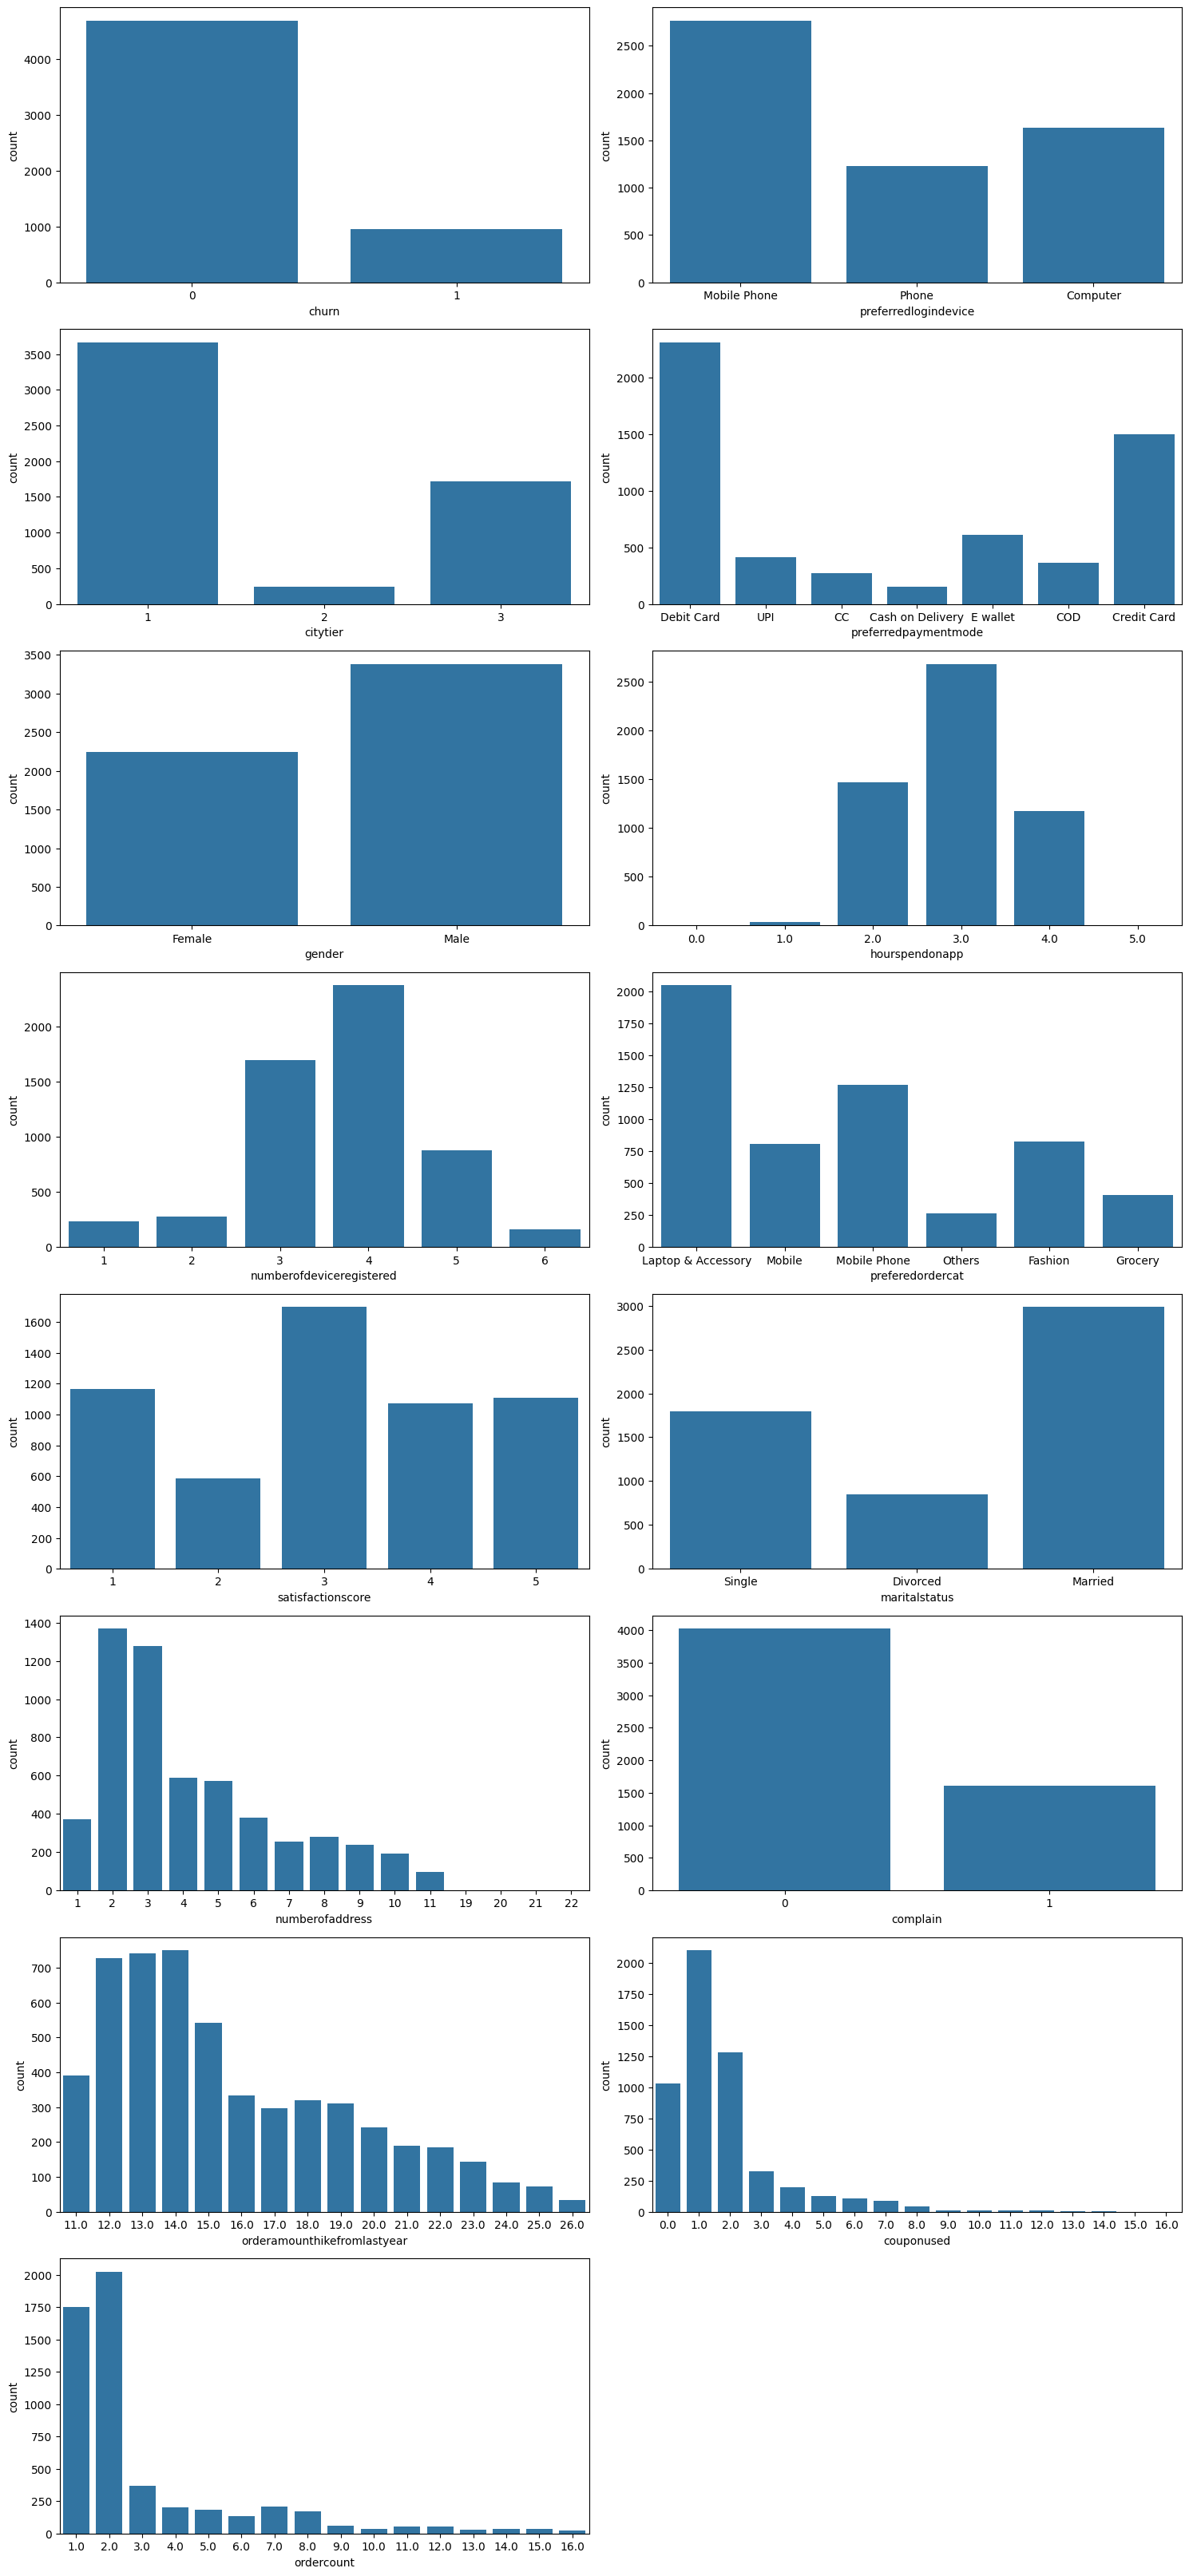

In [20]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x=col)
    plot_num += 1
    plt.tight_layout()

##Histograms of numerical columns

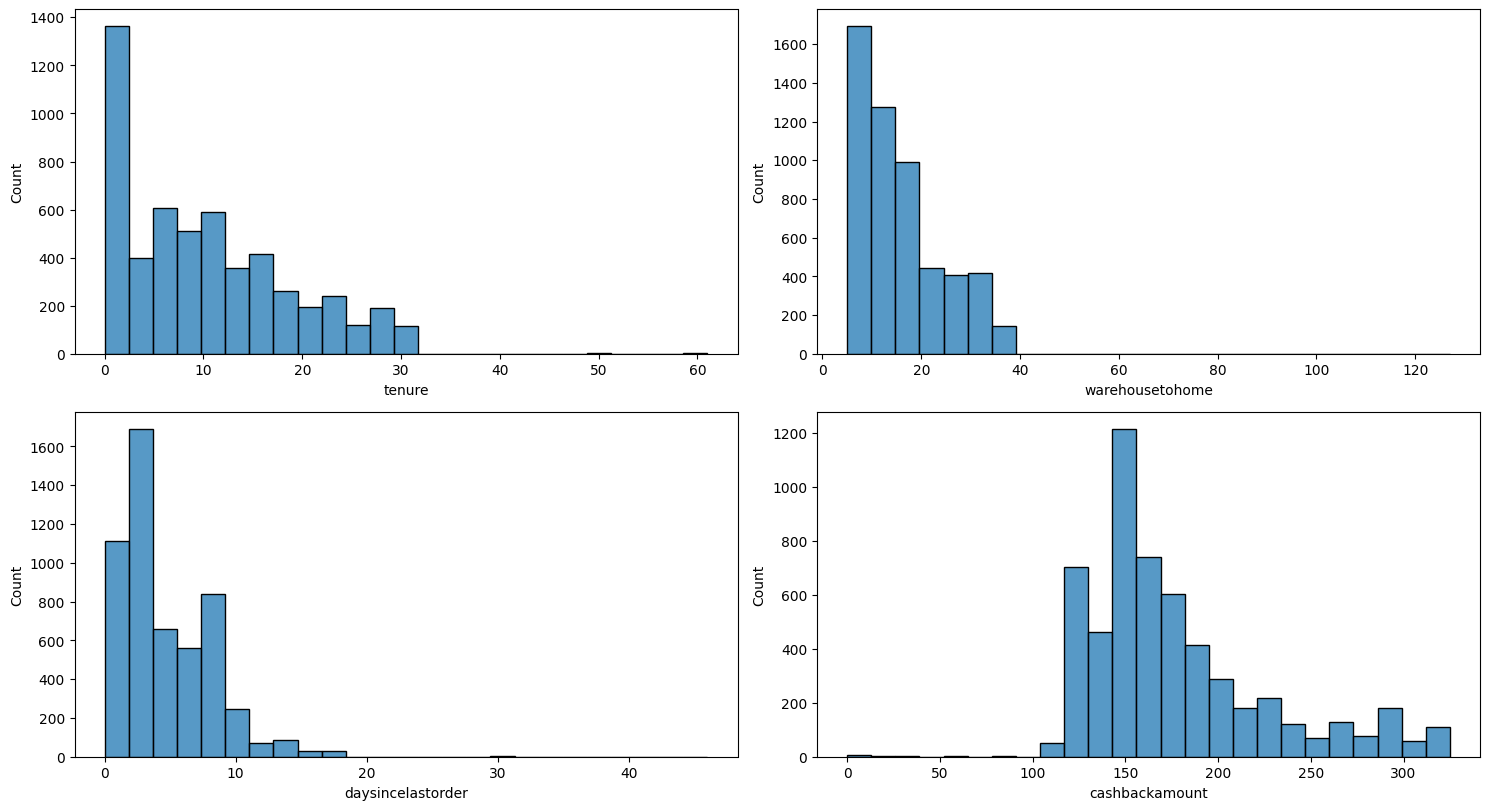

In [21]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

##Multi variant analysis

###Plot the Churn distribution for each categorical variable

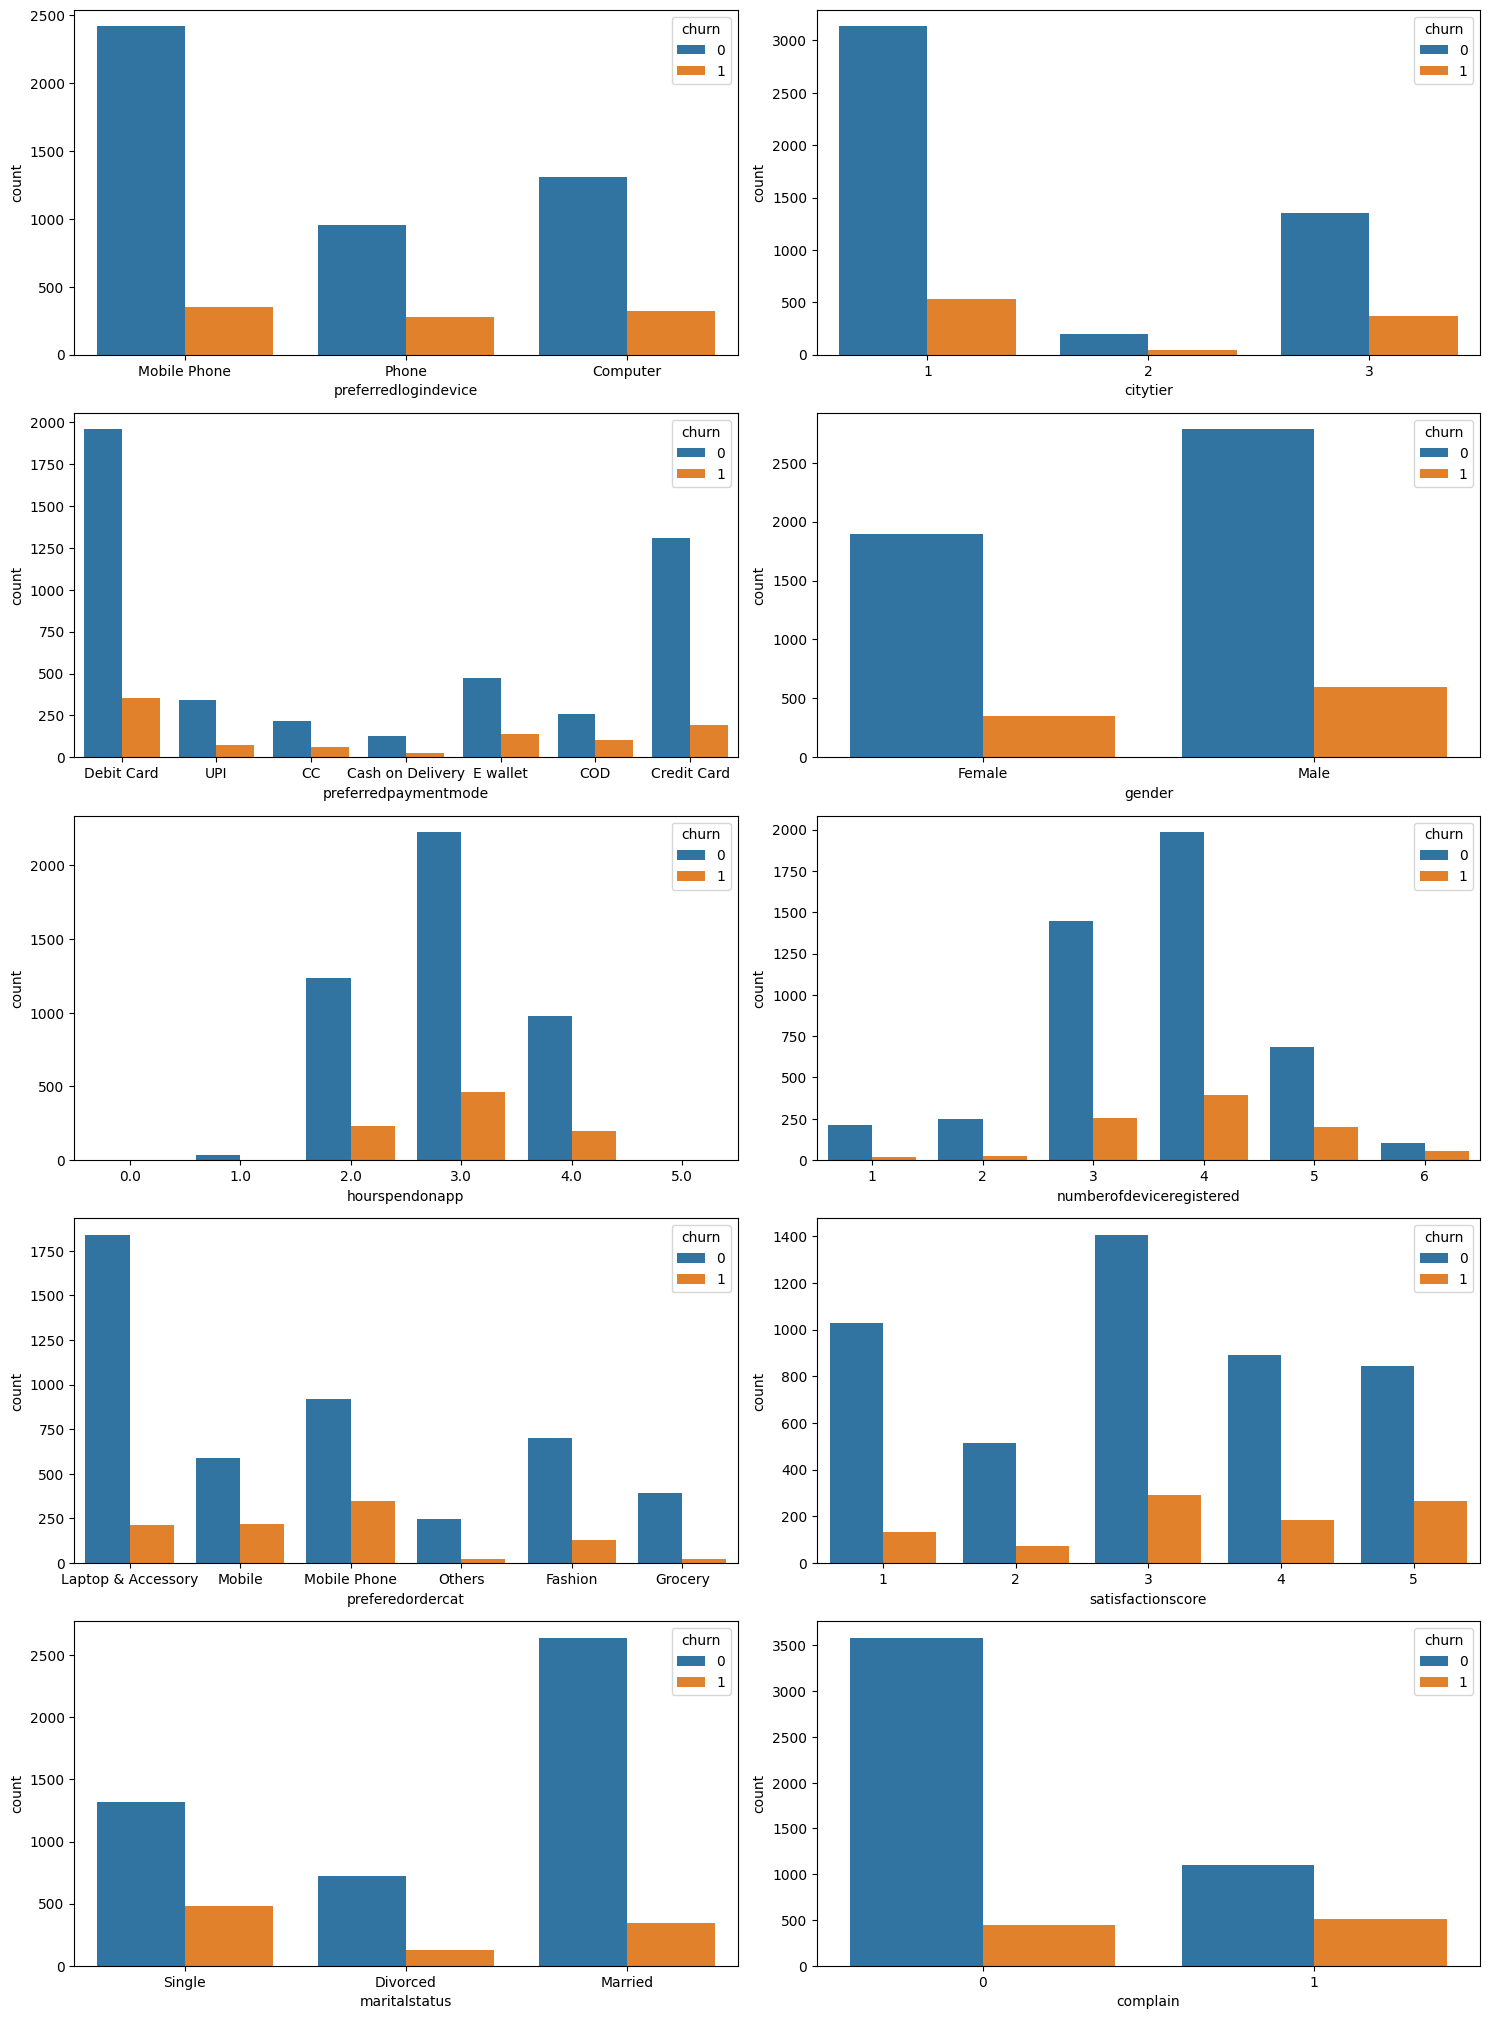

In [22]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="churn")
        plot_num += 1
        plt.tight_layout()

now the problem is there are some duplicate columns like moblie + mobile phone, cc + credit card.. Merging them to 1 column

##prefered login device

In [23]:
login_mapping = {
    'Mobile Phone': 'Mobile',  # Merge 'Mobile Phone' into 'Mobile'
    'Phone': 'Mobile'         # Merge 'Phone' into 'Mobile'
}
df['preferredlogindevice'] = df['preferredlogindevice'].replace(login_mapping)

In [24]:
# With aggregation:
df_clean = df.groupby('preferredlogindevice', as_index=False).sum()
print(df_clean)

  preferredlogindevice  churn   tenure  citytier  warehousetohome  \
0             Computer    324  14954.0      2698          24864.0   
1               Mobile    624  39725.0      6618          59263.0   

                                preferredpaymentmode  \
0  Debit CardDebit CardDebit CardDebit CardE wall...   
1  Debit CardUPIDebit CardDebit CardCCCash on Del...   

                                              gender  hourspendonapp  \
0  FemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFe...          4535.0   
1  FemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMa...         11222.0   

   numberofdeviceregistered  \
0                      6083   
1                     14686   

                                    preferedordercat  satisfactionscore  \
0  Mobile PhoneMobileLaptop & AccessoryFashionFas...               4884   
1  Laptop & AccessoryMobileMobileLaptop & Accesso...              12382   

                                       maritalstatus  numberofaddress  \
0  SingleSing

##prefered payment method

In [25]:
payment_mapping = {
    'Cash on Delivery': 'Cash on Delivery',  # Merge 'Mobile Phone' into 'Mobile'
    'COD': 'Cash on Delivery',
    'Credit Card': 'Credit Card',
    'CC': 'Credit Card',
}
df['preferredpaymentmode'] = df['preferredpaymentmode'].replace(payment_mapping)

In [26]:
# With aggregation:
df_clean = df.groupby('preferredpaymentmode', as_index=False).sum()
print(df_clean)

  preferredpaymentmode  churn   tenure  \
0     Cash on Delivery    128   4697.0   
1          Credit Card    252  17259.0   
2           Debit Card    356  22945.0   
3             E wallet    140   6247.0   
4                  UPI     72   3531.0   

                                preferredlogindevice  citytier  \
0  MobileMobileMobileComputerMobileComputerMobile...       794   
1  MobileMobileMobileMobileMobileMobileMobileMobi...      2508   
2  MobileMobileMobileComputerMobileMobileComputer...      3528   
3  MobileMobileMobileMobileMobileComputerMobileCo...      1842   
4  MobileMobileComputerMobileMobileMobileMobileMo...       644   

   warehousetohome                                             gender  \
0           7390.0  MaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMale...   
1          26626.0  MaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMale...   
2          33921.0  FemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMa...   
3           9997.0  MaleMaleMaleMaleMaleFemaleMaleFemaleFe

##prefered prder category

In [27]:
order_mapping = {
    'Mobile Phone': 'Mobile',  # Merge 'Mobile Phone' into 'Mobile'
    'Mobile': 'Mobile'         # Merge 'Phone' into 'Mobile'
}
df['preferedordercat'] = df['preferedordercat'].replace(order_mapping)

In [28]:
# With aggregation:
df_clean = df.groupby('preferedordercat', as_index=False).sum()
print(df_clean)

     preferedordercat  churn   tenure  \
0             Fashion    128  10065.0   
1             Grocery     20   8417.0   
2  Laptop & Accessory    210  19464.0   
3              Mobile    570  11421.0   
4              Others     20   5312.0   

                                preferredlogindevice  citytier  \
0  MobileMobileMobileComputerMobileComputerMobile...      1482   
1  MobileComputerMobileMobileMobileMobileComputer...       684   
2  MobileMobileMobileMobileComputerMobileMobileMo...      3954   
3  MobileMobileMobileComputerMobileMobileMobileMo...      2806   
4  MobileMobileMobileMobileMobileMobileMobileComp...       390   

   warehousetohome                               preferredpaymentmode  \
0          13383.0  Debit CardCredit CardCredit CardDebit CardE wa...   
1           6791.0  Credit CardCredit CardE walletCash on Delivery...   
2          32790.0  Debit CardDebit CardCash on DeliveryE walletDe...   
3          27799.0  UPIDebit CardCredit CardDebit CardCredit Car

##Final plotting

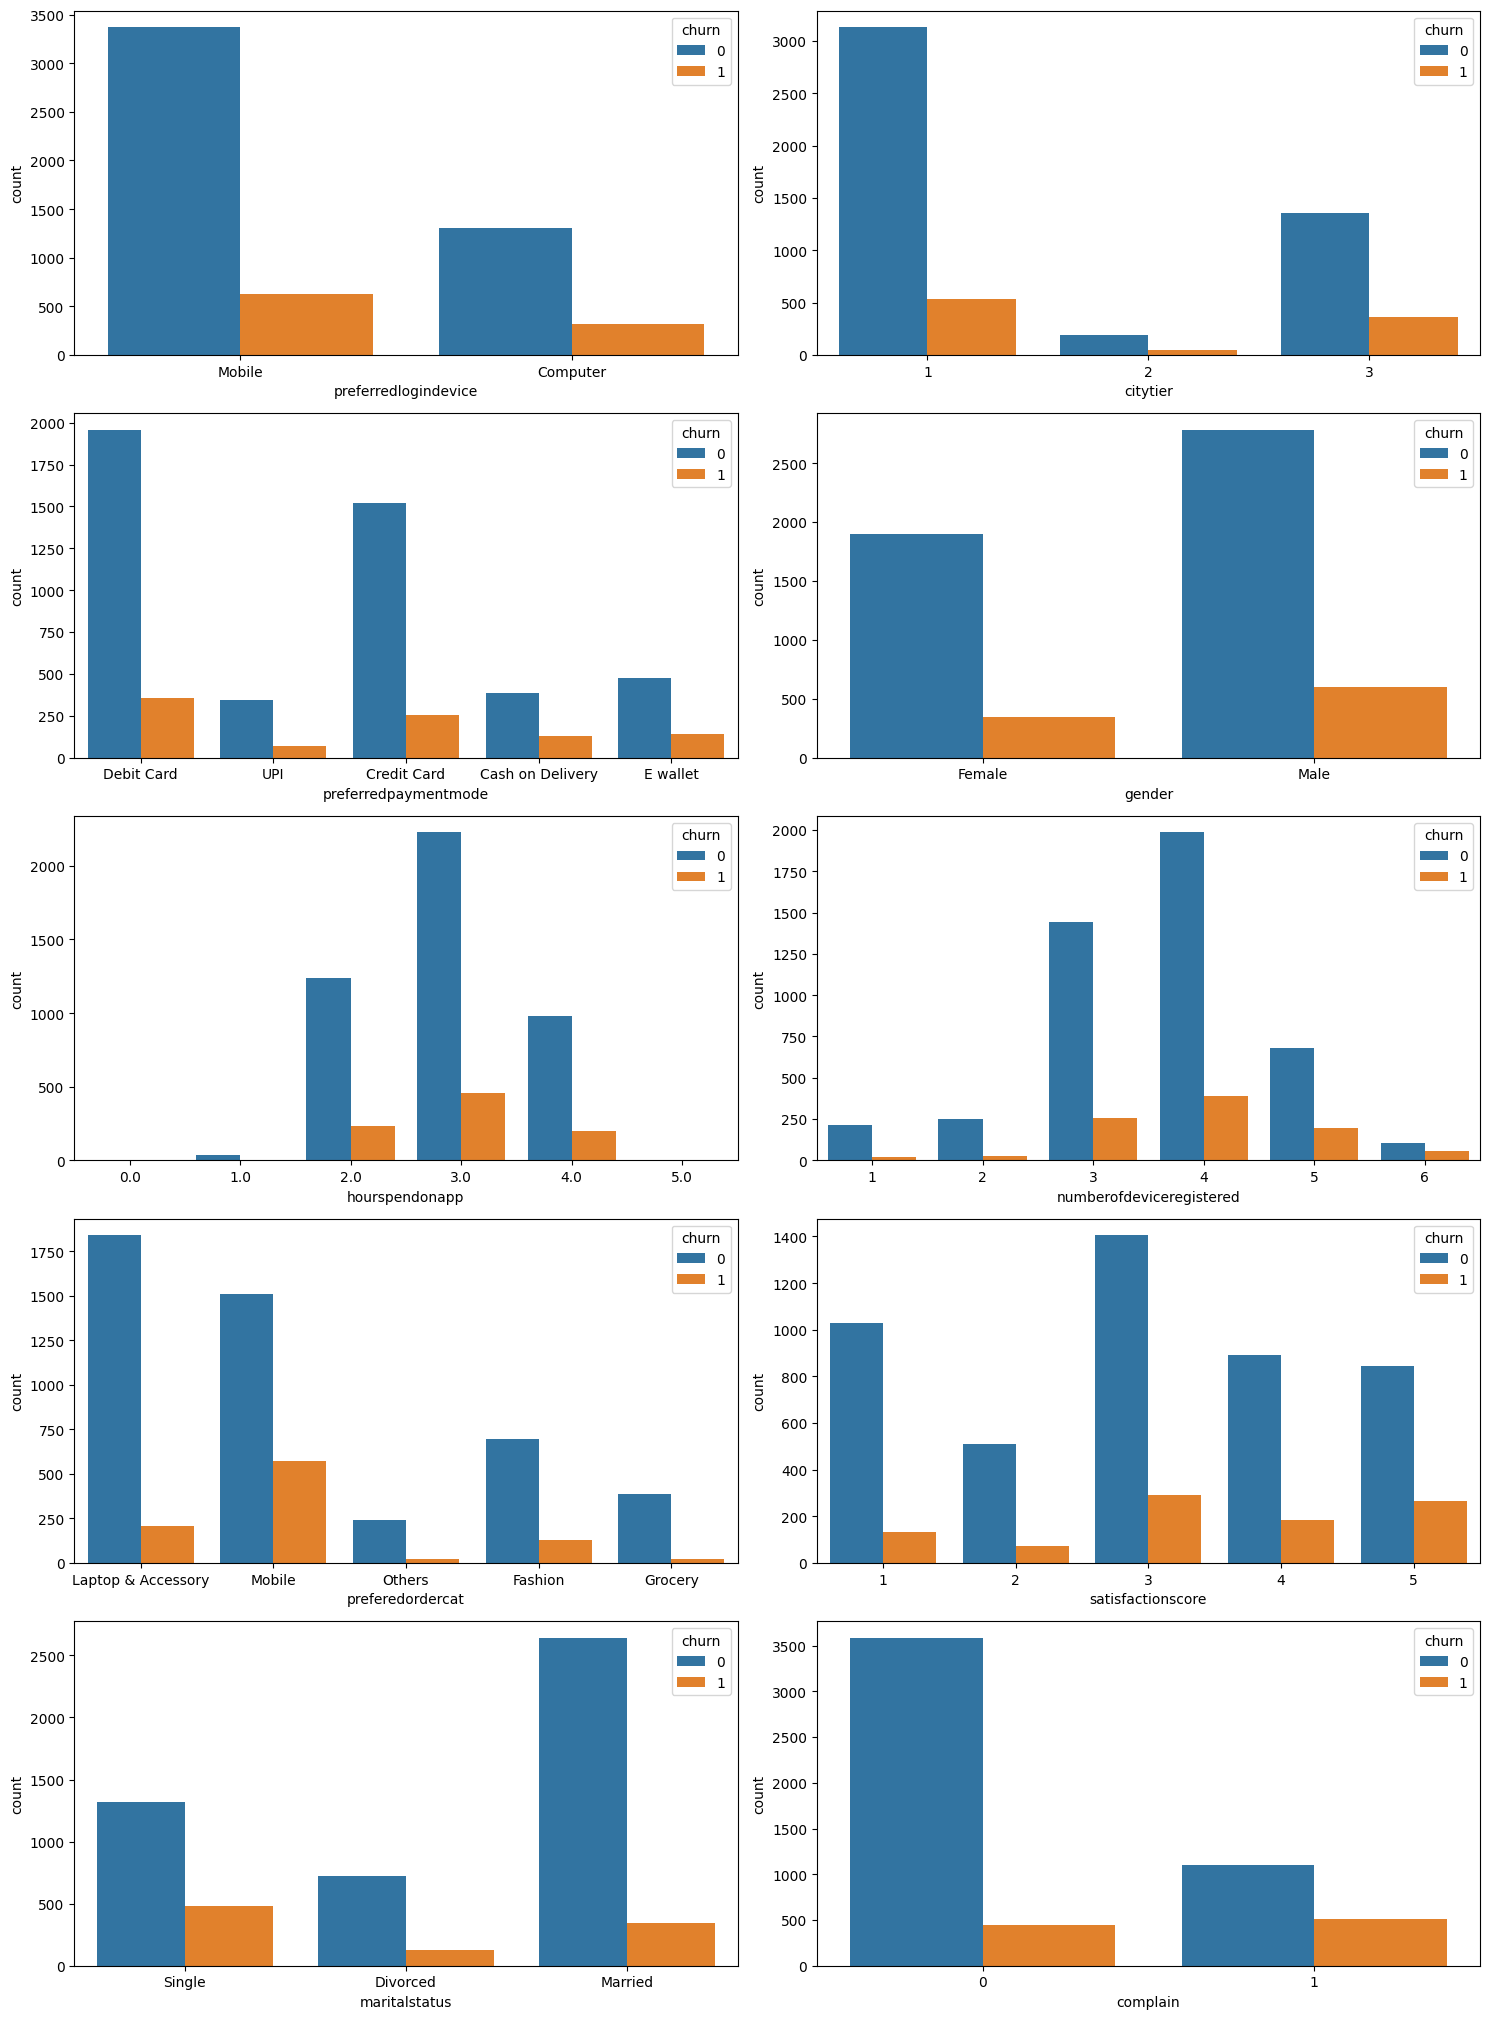

In [29]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="churn")
        plot_num += 1
        plt.tight_layout()

##Data Cleaning

Handle missing values (impute or drop)

Fix outliers

Normalize or scale features if needed

Encode categorical variables (Label Encoding, One-Hot Encoding, etc.)

Remove duplicates or irrelevant features


###Handle Missing Values

In [30]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter only columns that have missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and their count:")
print(missing_columns)

Columns with missing values and their count:
tenure                         264
warehousetohome                251
hourspendonapp                 255
orderamounthikefromlastyear    265
couponused                     256
ordercount                     258
daysincelastorder              307
dtype: int64


In [31]:
tenure_median_by_order = df.groupby("ordercount")["tenure"].median()
def impute_tenure(row):
    if pd.isna(row["tenure"]):
        return tenure_median_by_order.get(row["ordercount"], df["tenure"].median())
    return row["tenure"]

df["tenure"] = df.apply(impute_tenure, axis=1)
print(df["tenure"].isnull().sum())

0


In [32]:
hour_median_by_group = df.groupby(["ordercount", "couponused"])["hourspendonapp"].median()

# Step 2: Define function to fill missing values
def impute_hours(row):
    if pd.isna(row["hourspendonapp"]):
        return hour_median_by_group.get((row["ordercount"], row["couponused"]), df["hourspendonapp"].median())
    return row["hourspendonapp"]

# Apply imputation function
df["hourspendonapp"] = df.apply(impute_hours, axis=1)

# Step 3: Ensure no NaN values remain
df["hourspendonapp"].fillna(df["hourspendonapp"].median(), inplace=True)

print(df["hourspendonapp"].isnull().sum())

0


In [33]:
hike_median_by_group = df.groupby(["ordercount"])["orderamounthikefromlastyear"].median()

# Step 2: Define function to fill missing values
def impute_hike(row):
    if pd.isna(row["orderamounthikefromlastyear"]):
        if row["tenure"] < 2:  # New users likely have low hike
            return 0.0
        return hike_median_by_group.get(row["ordercount"], df["orderamounthikefromlastyear"].median())
    return row["orderamounthikefromlastyear"]

# Apply imputation function
df["orderamounthikefromlastyear"] = df.apply(impute_hike, axis=1)

# Step 3: Ensure no NaN values remain
df["orderamounthikefromlastyear"].fillna(df["orderamounthikefromlastyear"].median(), inplace=True)

print(df["orderamounthikefromlastyear"].isnull().sum())

0


In [34]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter only columns that have missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and their count:")
print(missing_columns)

Columns with missing values and their count:
warehousetohome      251
couponused           256
ordercount           258
daysincelastorder    307
dtype: int64


In [35]:
scaler = StandardScaler()
knn_features = df[["citytier", "ordercount", "warehousetohome"]]
scaled_features = scaler.fit_transform(knn_features)

# Instantiate KNNImputer
knn_imputer = KNNImputer(n_neighbors=5) # You can adjust n_neighbors as needed

imputed_values = knn_imputer.fit_transform(scaled_features)

In [36]:
# Assign only the imputed warehousetohome values back to the missing ones
df.loc[df["warehousetohome"].isna(), "warehousetohome"] = imputed_values[df["warehousetohome"].isna(), 2]

### 2. Impute couponused (based on ordercount median)
coupon_median_by_orders = df.groupby("ordercount")["couponused"].median()

def impute_coupon(row):
    if pd.isna(row["couponused"]):
        return 0 if row["ordercount"] == 0 else coupon_median_by_orders.get(row["ordercount"], df["couponused"].median())
    return row["couponused"]

df["couponused"] = df.apply(impute_coupon, axis=1)

### 3. Impute ordercount (based on daysincelastorder)
order_median_by_days = df.groupby("daysincelastorder")["ordercount"].median()

def impute_order(row):
    if pd.isna(row["ordercount"]):
        return order_median_by_days.get(row["daysincelastorder"], df["ordercount"].median())
    return row["ordercount"]

df["ordercount"] = df.apply(impute_order, axis=1)

### 4. Impute daysincelastorder (based on ordercount)
day_median_by_orders = df.groupby("ordercount")["daysincelastorder"].median()

def impute_days(row):
    if pd.isna(row["daysincelastorder"]):
        return 365 if row["ordercount"] == 0 else day_median_by_orders.get(row["ordercount"], df["daysincelastorder"].median())
    return row["daysincelastorder"]

df["daysincelastorder"] = df.apply(impute_days, axis=1)

# Final check for remaining NaN values
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
churn                          0
tenure                         0
preferredlogindevice           0
citytier                       0
warehousetohome                0
preferredpaymentmode           0
gender                         0
hourspendonapp                 0
numberofdeviceregistered       0
preferedordercat               0
satisfactionscore              0
maritalstatus                  0
numberofaddress                0
complain                       0
orderamounthikefromlastyear    0
couponused                     0
ordercount                     0
daysincelastorder              0
cashbackamount                 0
dtype: int64


In [37]:
df.head()

churn  tenure preferredlogindevice  citytier  warehousetohome  \
0      1     4.0               Mobile         3              6.0   
1      1     7.0               Mobile         1              8.0   
2      1     7.0               Mobile         1             30.0   
3      1     0.0               Mobile         3             15.0   
4      1     0.0               Mobile         1             12.0   

  preferredpaymentmode  gender  hourspendonapp  numberofdeviceregistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             2.0                         3   

     preferedordercat  satisfactionscore maritalstatus  numberofaddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   complain  orderamounthikefromlastyear  couponused  ordercount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   daysincelastorder  cashbackamount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

##Handling outliers


Generating Box plots for numerical columns to identify outliers...


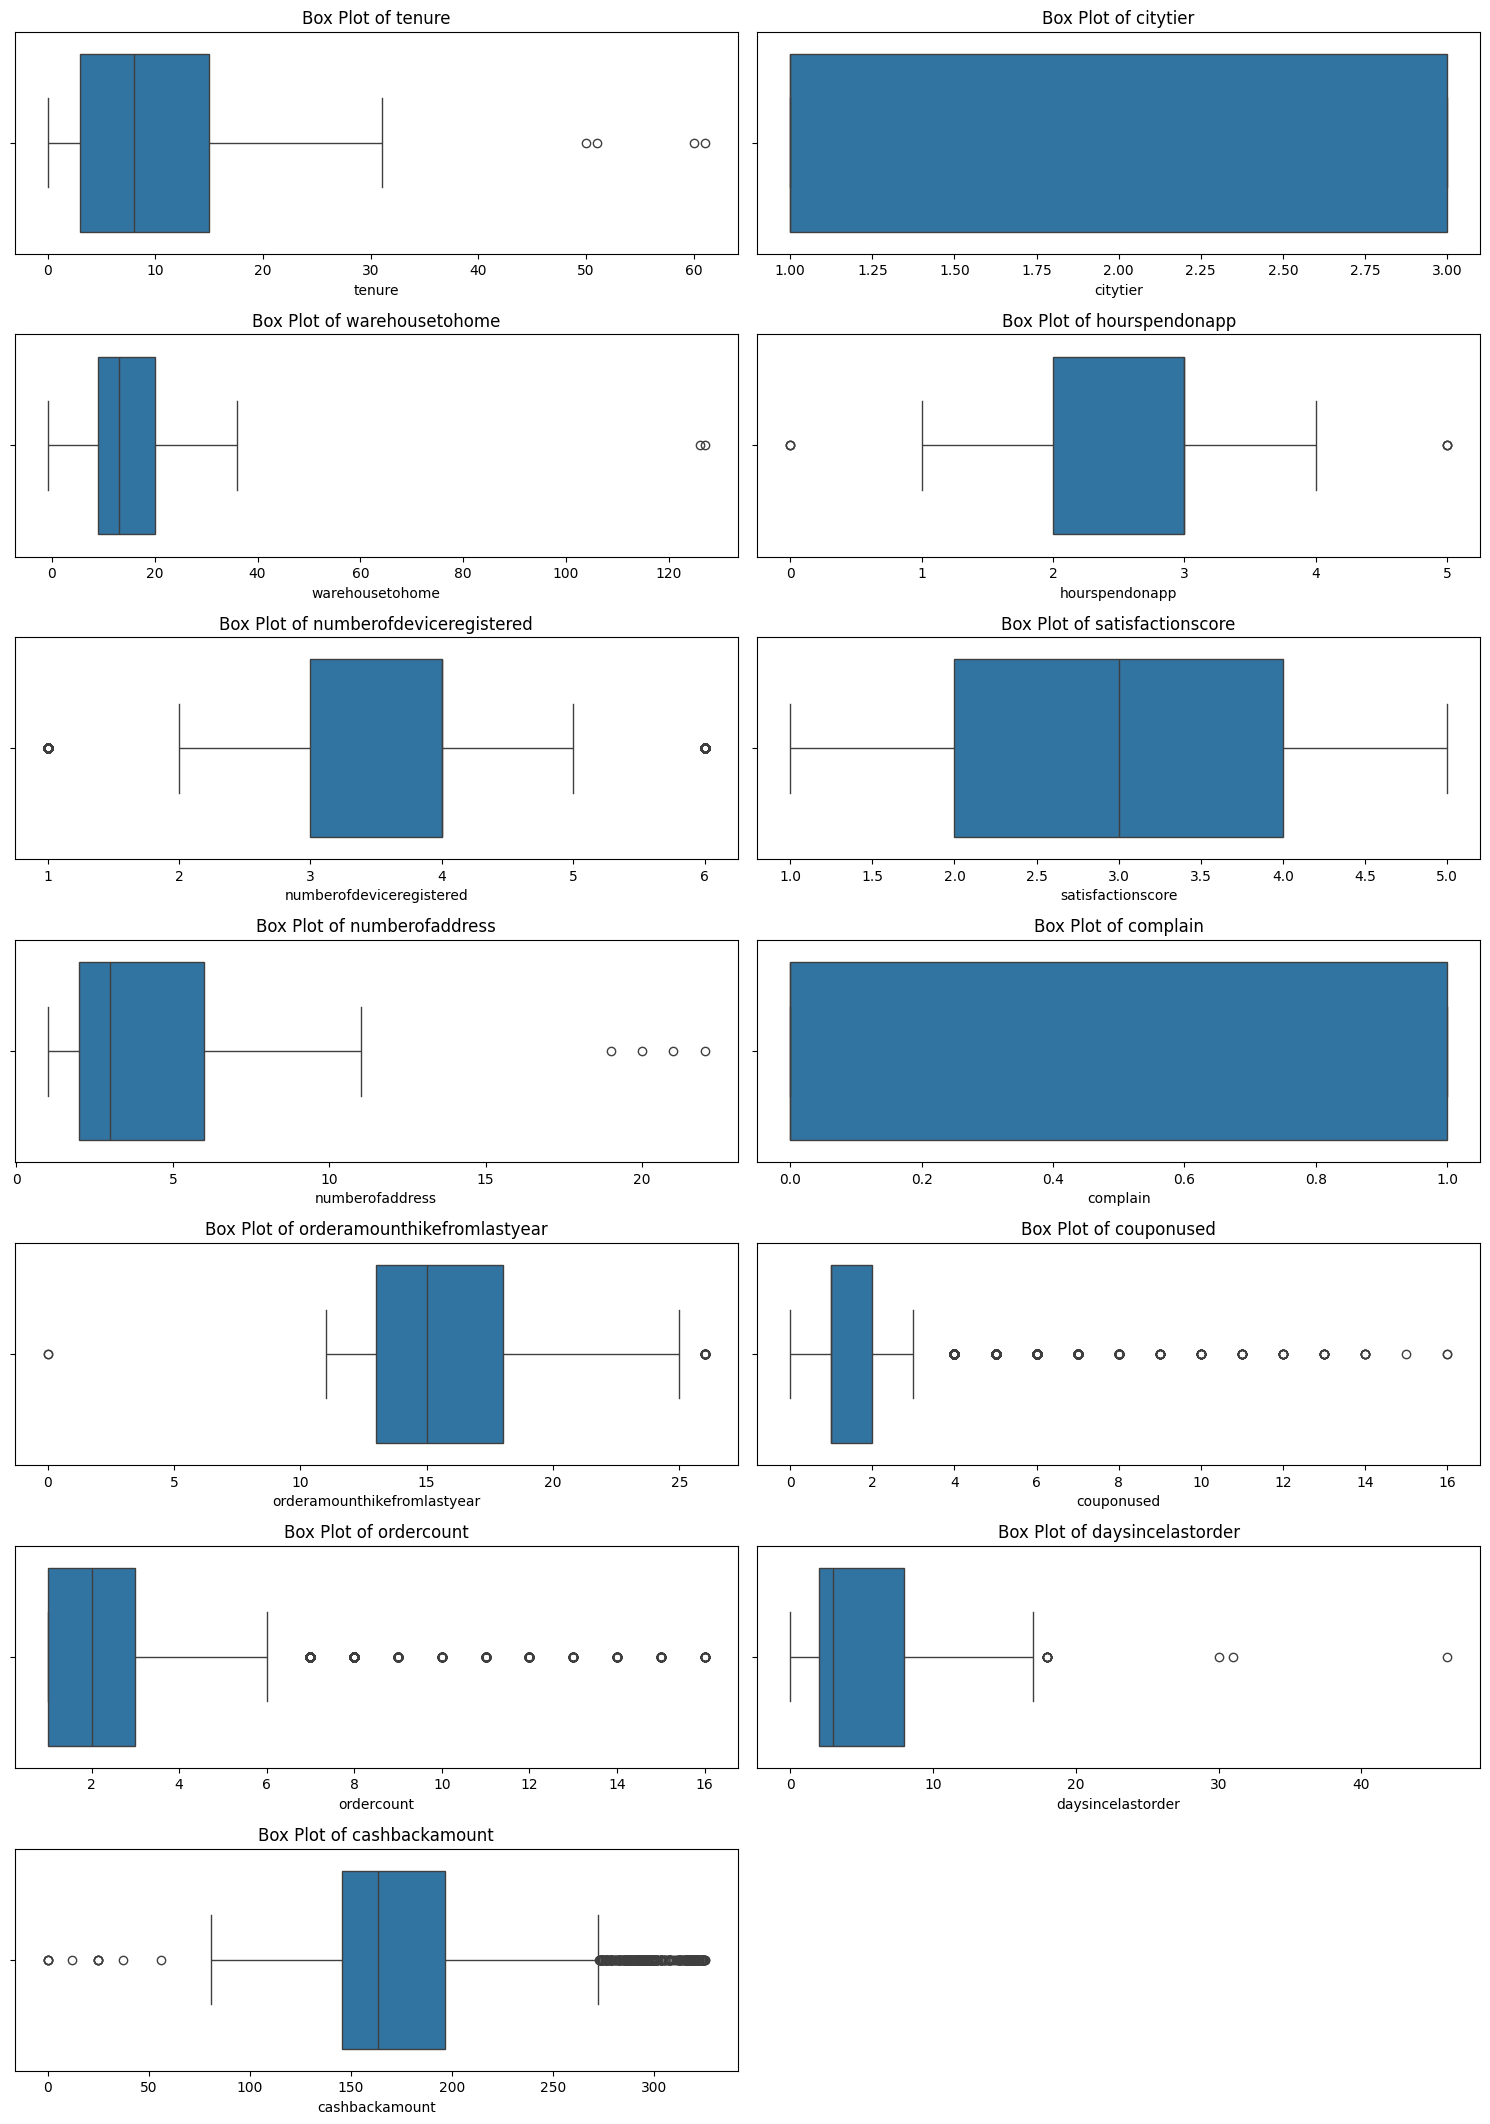


Example: Identifying outliers in the 'tenure' column using IQR
Q1 for tenure: 3.00
Q3 for tenure: 15.00
IQR for tenure: 12.00
Lower bound for outliers: -15.00
Upper bound for outliers: 33.00

Number of outliers detected in 'tenure': 4


In [91]:
hist_col = df.select_dtypes(include=np.number).columns.tolist()
# Exclude binary columns like 'churn' if they were included as numbers
if 'churn' in hist_col:
    hist_col.remove('churn')

print("\nGenerating Box plots for numerical columns to identify outliers...")

plt.figure(figsize=(15, 30)) # Adjust figure size as needed
plot_num = 1
for col in hist_col:
    if plot_num <= 20: # Limit the number of plots if there are too many columns
        plt.subplot(10, 2, plot_num)
        sns.boxplot(data=df, x=col)
        plt.title(f'Box Plot of {col}')
        plot_num += 1
plt.tight_layout()
plt.show()

print("\nExample: Identifying outliers in the 'tenure' column using IQR")

Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)]

print(f"Q1 for tenure: {Q1:.2f}")
print(f"Q3 for tenure: {Q3:.2f}")
print(f"IQR for tenure: {IQR:.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

print(f"\nNumber of outliers detected in 'tenure': {outliers.shape[0]}")


# Apply capping
# Using numpy.clip is an efficient way to do this

In [96]:
# --- Handling Outliers for 'tenure' using Capping ---

print("\nHandling outliers in 'tenure' using capping...")

# Calculate Q1, Q3, IQR, Lower Bound, and Upper Bound for 'tenure' again
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Capping 'tenure' using bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

df['tenure'] = np.clip(df['tenure'], a_min=lower_bound, a_max=upper_bound)

print("'tenure' column after capping:")
print(df['tenure'].describe()) # Check describe to see the effect of capping on min/max

# Optional: Verify if any outliers remain (they shouldn't after capping)
outliers_after_capping = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)]
print(f"\nNumber of outliers detected in 'tenure' after capping: {outliers_after_capping.shape[0]}")

for col in hist_col:
     print(f"\nProcessing outliers for column: {col}")
     Q1 = df[col].quantile(0.25)
     Q3 = df[col].quantile(0.75)
     IQR = Q3 - Q1
     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR

#     # Calculate the number of outliers before capping
     initial_outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
     print(f"  Initial outliers in '{col}': {initial_outliers_count}")

     if initial_outliers_count > 0: # Only cap if outliers exist
         df[col] = np.clip(df[col], a_min=lower_bound, a_max=upper_bound)
         print(f"  Capped outliers in '{col}' using bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
         # Verify after capping
         outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
         print(f"  Outliers in '{col}' after capping: {outliers_after}")
     else:
         print(f"  No outliers found in '{col}' using IQR method, no capping applied.")


Handling outliers in 'tenure' using capping...
Capping 'tenure' using bounds: [-15.00, 33.00]
'tenure' column after capping:
count    5630.000000
mean       10.037123
std         8.311352
min         0.000000
25%         3.000000
50%         8.000000
75%        15.000000
max        33.000000
Name: tenure, dtype: float64

Number of outliers detected in 'tenure' after capping: 0

Processing outliers for column: tenure
  Initial outliers in 'tenure': 0
  No outliers found in 'tenure' using IQR method, no capping applied.

Processing outliers for column: citytier
  Initial outliers in 'citytier': 0
  No outliers found in 'citytier' using IQR method, no capping applied.

Processing outliers for column: warehousetohome
  Initial outliers in 'warehousetohome': 0
  No outliers found in 'warehousetohome' using IQR method, no capping applied.

Processing outliers for column: hourspendonapp
  Initial outliers in 'hourspendonapp': 0
  No outliers found in 'hourspendonapp' using IQR method, no cap


Generating Box plots AFTER REMOVING OUTLIERS...


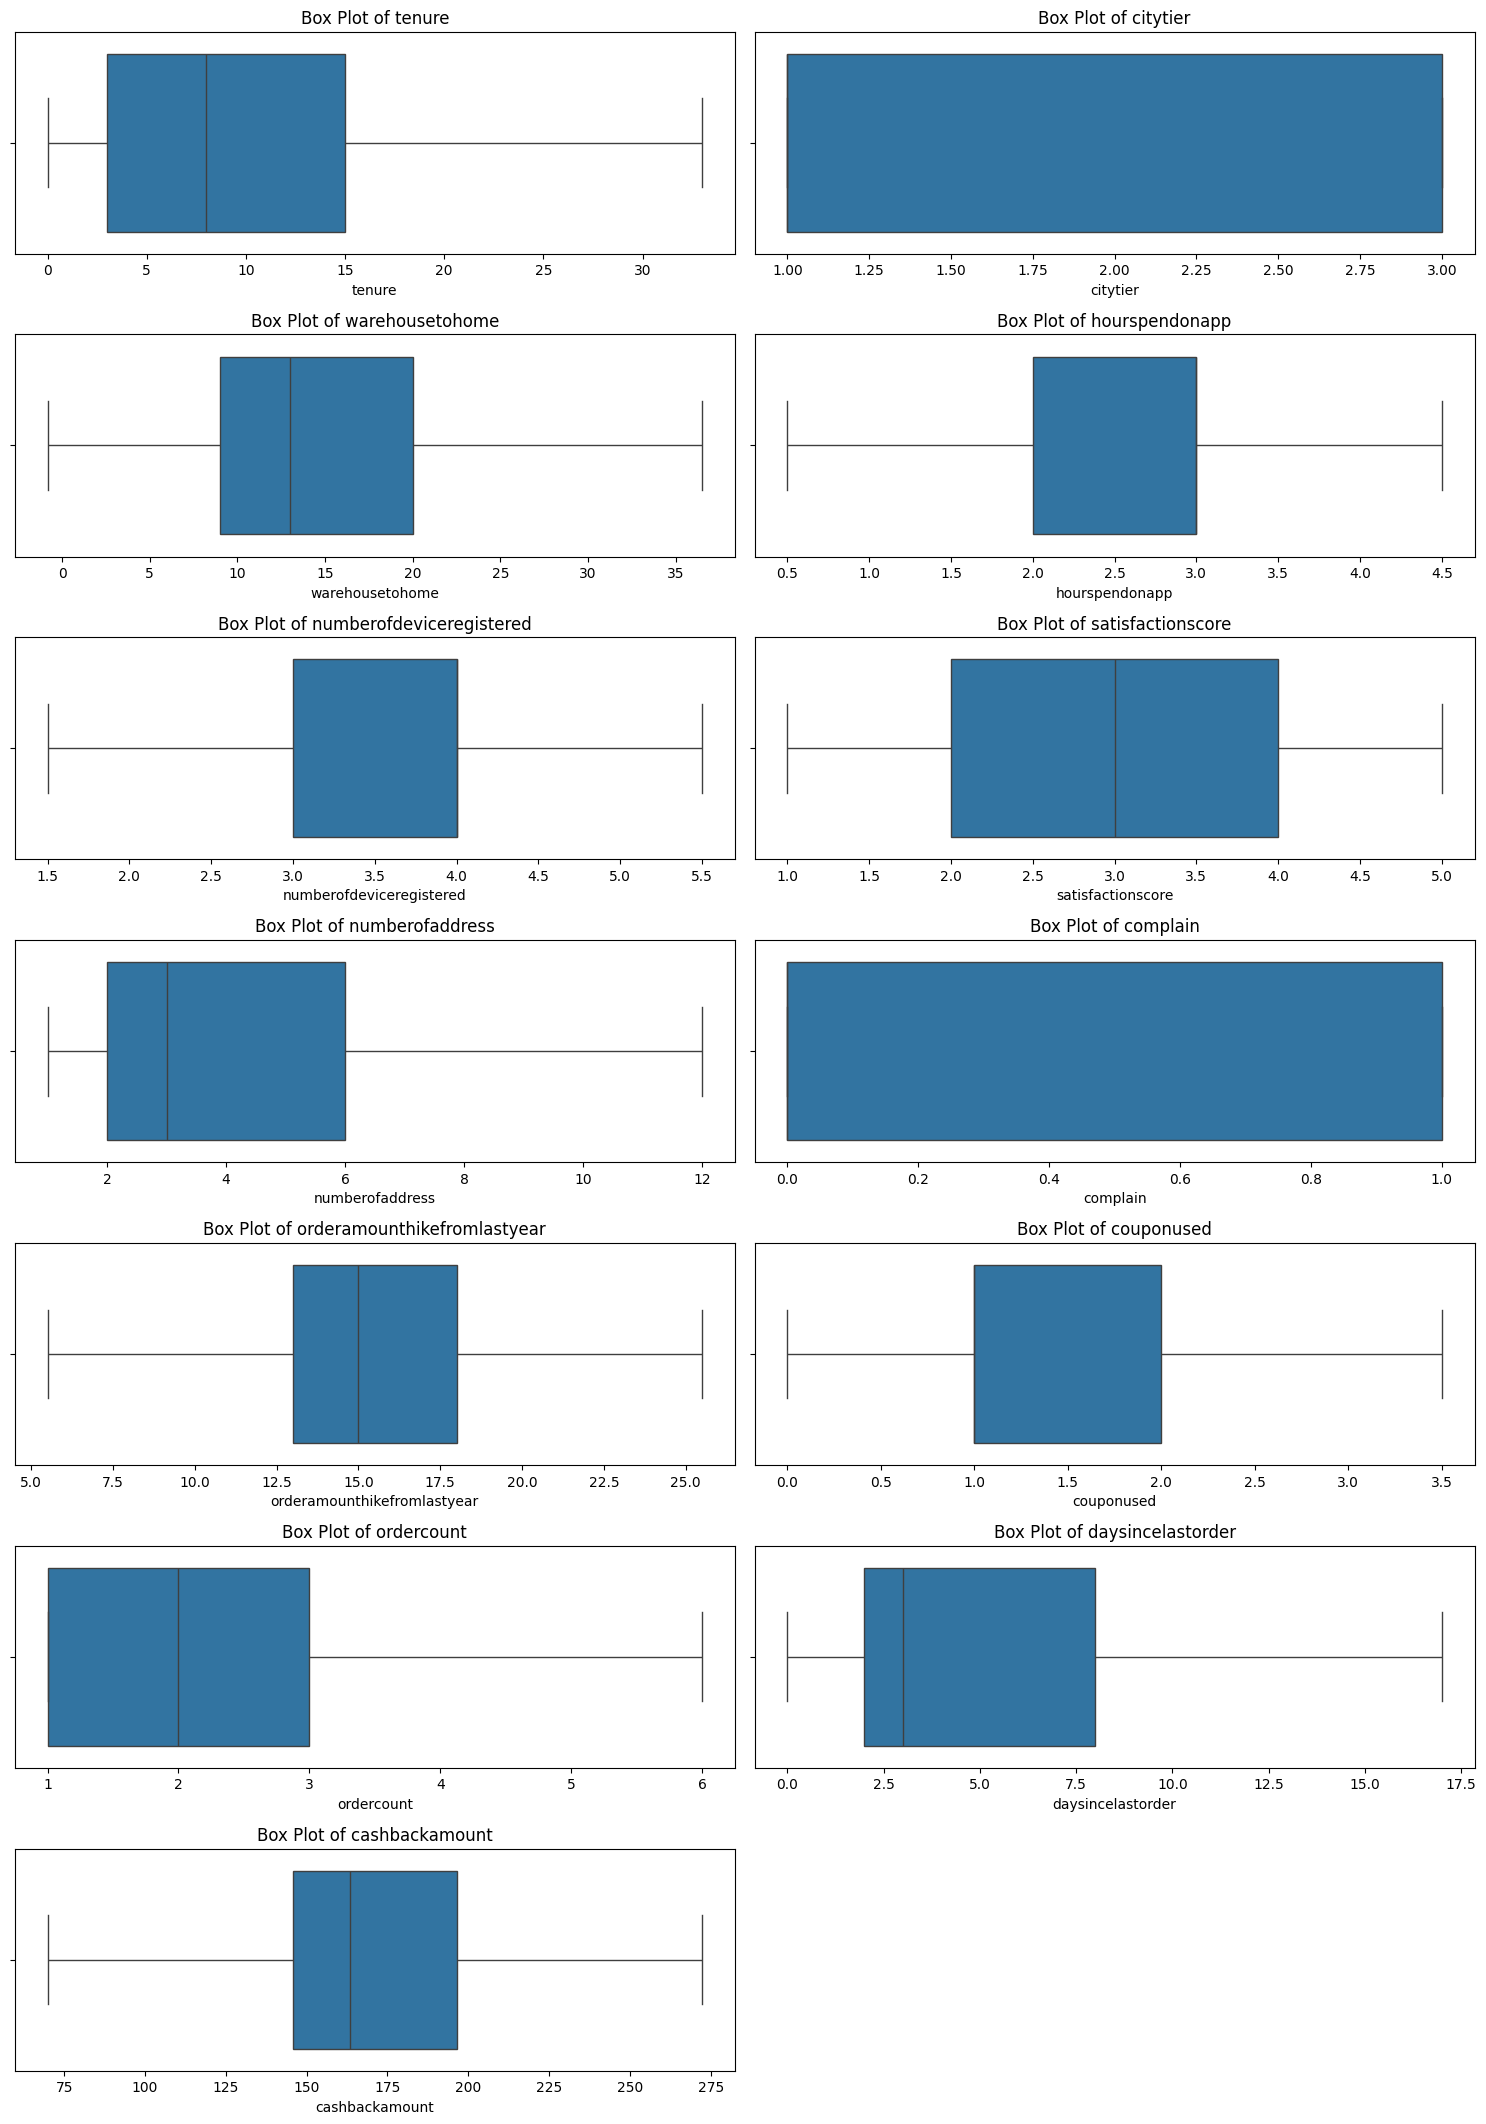


Example: Identifying outliers in the 'tenure' column using IQR
Q1 for tenure: 3.00
Q3 for tenure: 15.00
IQR for tenure: 12.00
Lower bound for outliers: -15.00
Upper bound for outliers: 33.00


In [97]:
hist_col = df.select_dtypes(include=np.number).columns.tolist()
# Exclude binary columns like 'churn' if they were included as numbers
if 'churn' in hist_col:
    hist_col.remove('churn')

print("\nGenerating Box plots AFTER REMOVING OUTLIERS...")

plt.figure(figsize=(15, 30)) # Adjust figure size as needed
plot_num = 1
for col in hist_col:
    if plot_num <= 20: # Limit the number of plots if there are too many columns
        plt.subplot(10, 2, plot_num)
        sns.boxplot(data=df, x=col)
        plt.title(f'Box Plot of {col}')
        plot_num += 1
plt.tight_layout()
plt.show()

print("\nExample: Identifying outliers in the 'tenure' column using IQR")

Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)]

print(f"Q1 for tenure: {Q1:.2f}")
print(f"Q3 for tenure: {Q3:.2f}")
print(f"IQR for tenure: {IQR:.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")


In [99]:
# --- Remove Duplicate Rows ---

print("\nChecking for duplicate rows...")
initial_rows = df.shape[0]
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"Found {duplicate_rows} duplicate rows.")
    df.drop_duplicates(inplace=True) # Remove duplicate rows
    print(f"Removed {duplicate_rows} duplicate rows. DataFrame shape is now: {df.shape}")
else:
    print("No duplicate rows found.")

# --- Identifying Irrelevant Features ---

print("\nChecking feature variance (first 10 features as example):")
# Added numeric_only=True to calculate variance only for numerical columns
print(df.var(numeric_only=True).head(10)) # Check variance of numerical columns

print("\nChecking unique values per column (first 10 columns as example):")
print(df.nunique().head(10))


Checking for duplicate rows...
No duplicate rows found.

Checking feature variance (first 10 features as example):
churn                           0.138118
tenure                         69.704189
citytier                        0.844729
warehousetohome                76.098907
hourspendonapp                  0.527871
numberofdeviceregistered        0.896195
satisfactionscore               1.916514
numberofaddress                 6.459965
complain                        0.202819
orderamounthikefromlastyear    12.854467
dtype: float64

Checking unique values per column (first 10 columns as example):
churn                        2
tenure                      33
preferredlogindevice         2
citytier                     3
warehousetohome             49
preferredpaymentmode         5
gender                       2
hourspendonapp               8
numberofdeviceregistered     6
preferedordercat             5
dtype: int64


##Handle class imbalance

Class distribution:
 churn
0    4682
1     948
Name: count, dtype: int64


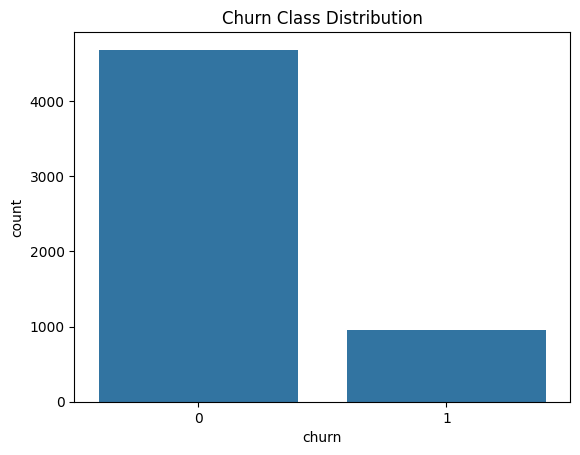

In [38]:
# Assuming df is your cleaned DataFrame
churn_counts = df['churn'].value_counts()
print("Class distribution:\n", churn_counts)

# Visualize
sns.countplot(x='churn', data=df)
plt.title("Churn Class Distribution")
plt.show()

###Split Data (Before Resampling)

In [39]:
X = df.drop('churn', axis=1)
y = df['churn']


In [40]:
# One-hot encode categorical features
X = pd.get_dummies(X)
print(X.head())

   tenure  citytier  warehousetohome  hourspendonapp  \
0     4.0         3              6.0             3.0   
1     7.0         1              8.0             3.0   
2     7.0         1             30.0             2.0   
3     0.0         3             15.0             2.0   
4     0.0         1             12.0             2.0   

   numberofdeviceregistered  satisfactionscore  numberofaddress  complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   
2                         4                  3                6         1   
3                         4                  5                8         0   
4                         3                  5                3         0   

   orderamounthikefromlastyear  couponused  ordercount  daysincelastorder  \
0                         11.0         1.0         1.0                5.0   
1                         15.0         0.0    

###Train test split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Number of features:", X_train.shape[1])
print("Number of classes:", len(y.unique()))

Training set size: 4504
Test set size: 1126
Number of features: 30
Number of classes: 2


###Handle Imbalance

In [42]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

####Check Class Balance After Resampling

In [46]:
print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_train_bal))

Before resampling: Counter({0: 3746, 1: 758})
After resampling: Counter({0: 3746, 1: 3746})



Class distribution in balanced training set (y_train_bal):
 Counter({0: 3746, 1: 3746})


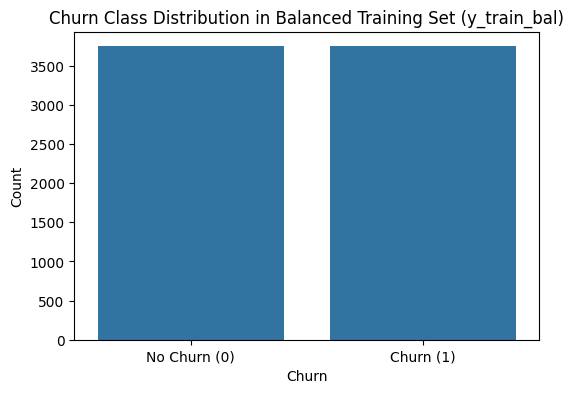

In [47]:
# Count the distribution in y_train_bal
churn_train_bal_counts = Counter(y_train_bal)
print("\nClass distribution in balanced training set (y_train_bal):\n", churn_train_bal_counts)

# Visualize the distribution in y_train_bal
plt.figure(figsize=(6, 4)) # Adjust figure size if needed
sns.countplot(x=y_train_bal)
plt.title("Churn Class Distribution in Balanced Training Set (y_train_bal)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No Churn (0)', 'Churn (1)'])
plt.show()

##Model Evaluation with Cross Validation

In [61]:
# Initialize the models
models=[
    #Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    #Linear Models
    LogisticRegressionCV(),
    RidgeClassifierCV(),

    #Nearest Neighbour
    KNeighborsClassifier(),

    #XGBoost
    XGBClassifier()
]

metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_acuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

In [65]:
scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = sklearn.model_selection.cross_validate(model, X, y, cv=5, # Use the explicitly imported module
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')
metrics_styled

In [66]:
print(X_train_bal.dtypes[X_train_bal.dtypes == 'object'])

Series([], dtype: object)


In [67]:
label_enc = LabelEncoder()
for col in X_train_bal.select_dtypes(include='object').columns:
    X_train_bal[col] = label_enc.fit_transform(X_train_bal[col])


just checking if pd.get_dummies(X)) successfully converted all categorical columns into numerical ones

In [68]:
print(X_train_bal)

         tenure  citytier  warehousetohome  hourspendonapp  \
0      9.000000         3        16.000000        2.000000   
1      6.000000         3        13.000000        1.000000   
2      8.000000         1        15.000000        3.000000   
3     15.000000         3        11.000000        3.000000   
4     12.000000         1        13.000000        4.000000   
...         ...       ...              ...             ...   
7487   7.320192         2        18.207885        3.000000   
7488  18.178334         1         9.000000        3.726111   
7489   0.366961         2        24.633039        3.000000   
7490   4.000000         3        10.000000        2.000000   
7491  17.553933         2         8.586838        3.206581   

      numberofdeviceregistered  satisfactionscore  numberofaddress  complain  \
0                            3                  1                2         0   
1                            3                  4                1         0   
2              

In [69]:
X_train_bal = X_train_bal.astype(float)


##SHAP explaination

Training XGBoost model for SHAP explanation...
Training complete.
Calculating SHAP values...


 99%|===================| 7421/7492 [00:52<00:00]       

SHAP values calculated.
Generating SHAP summary plot...


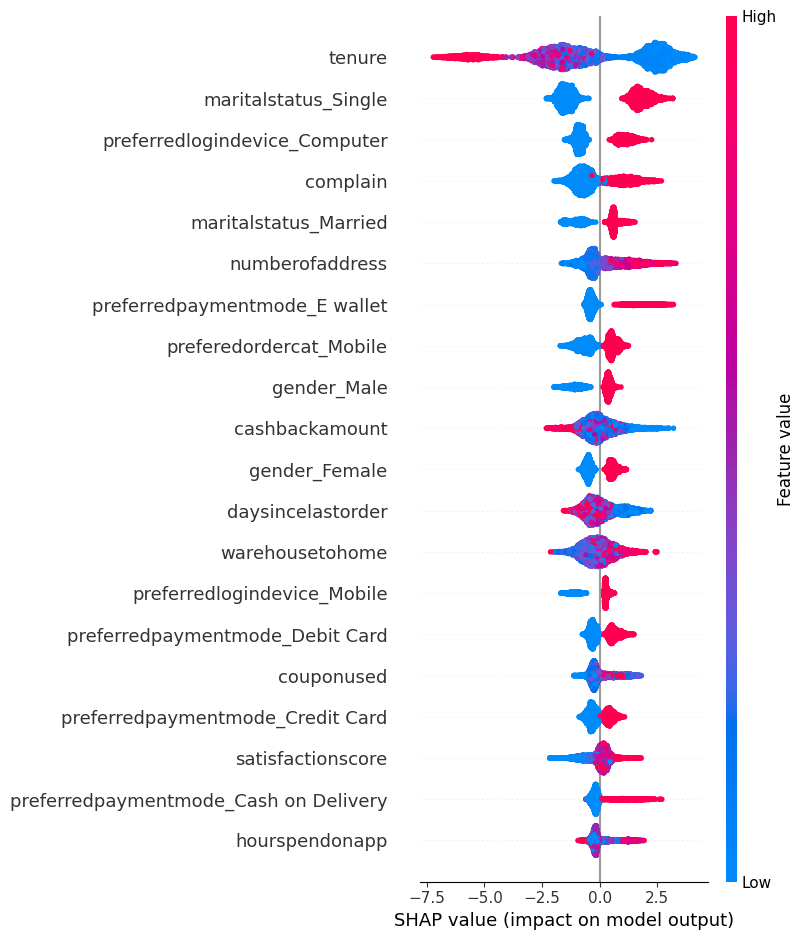

SHAP summary plot generated.


In [71]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on the balanced training data (X_train_bal and y_train_bal)
print("Training XGBoost model for SHAP explanation...")
model.fit(X_train_bal, y_train_bal)
print("Training complete.")

# --- Calculate SHAP values using the trained model ---
print("Calculating SHAP values...")
explainer = shap.Explainer(model, X_train_bal)
shap_values = explainer(X_train_bal)
print("SHAP values calculated.")

# --- Plot SHAP summary ---
print("Generating SHAP summary plot...")
shap.summary_plot(shap_values, X_train_bal)
print("SHAP summary plot generated.")

##describing the graph
*   Tenure is the most influential feature. Customers with low tenure (newer users) tend to have higher SHAP values, indicating an increased likelihood of churn.

*   Being Single contributes positively to churn risk.

*   Preferred Login Device shows that users who primarily use a computer are more likely to churn compared to those using mobile devices.

*  Complaints are a strong churn indicator. Customers who have complained are more likely to leave.

*   Cashback Amount appears to help retain customers — higher cashback correlates with lower churn likelihood.

*   Days Since Last Order is another key factor. Customers who haven’t ordered recently (high value) are at greater risk of churning


*   Features like Satisfaction Score and Order Amount Hike from Last Year have relatively low impact on the model's predictions.







##Up to this part all will remain same..
Now we will just add our new parts which is model creation.

##Correlation Analysis with Churn

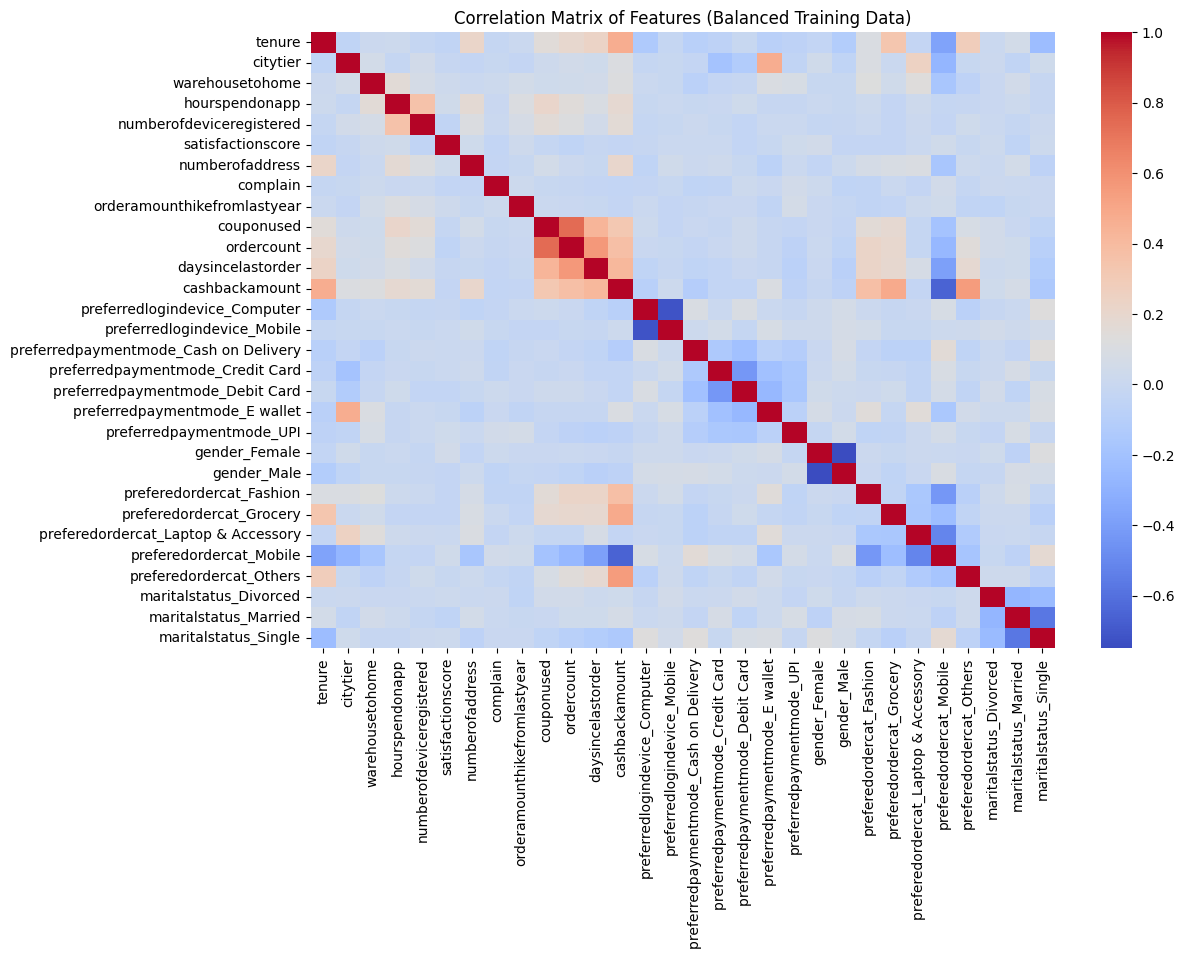


Correlation with Churn (Balanced Training Data):
 churn                                    1.000000
maritalstatus_Single                     0.367805
preferedordercat_Mobile                  0.335666
preferredlogindevice_Computer            0.208977
preferredpaymentmode_E wallet            0.205046
gender_Male                              0.196716
preferredpaymentmode_Cash on Delivery    0.181333
complain                                 0.126811
preferredlogindevice_Mobile              0.091625
gender_Female                            0.089518
preferredpaymentmode_Credit Card         0.081540
preferredpaymentmode_Debit Card          0.074797
citytier                                 0.066189
satisfactionscore                        0.065629
maritalstatus_Divorced                   0.059297
preferredpaymentmode_UPI                 0.059126
numberofdeviceregistered                 0.057105
preferedordercat_Fashion                 0.038639
warehousetohome                          0.028262

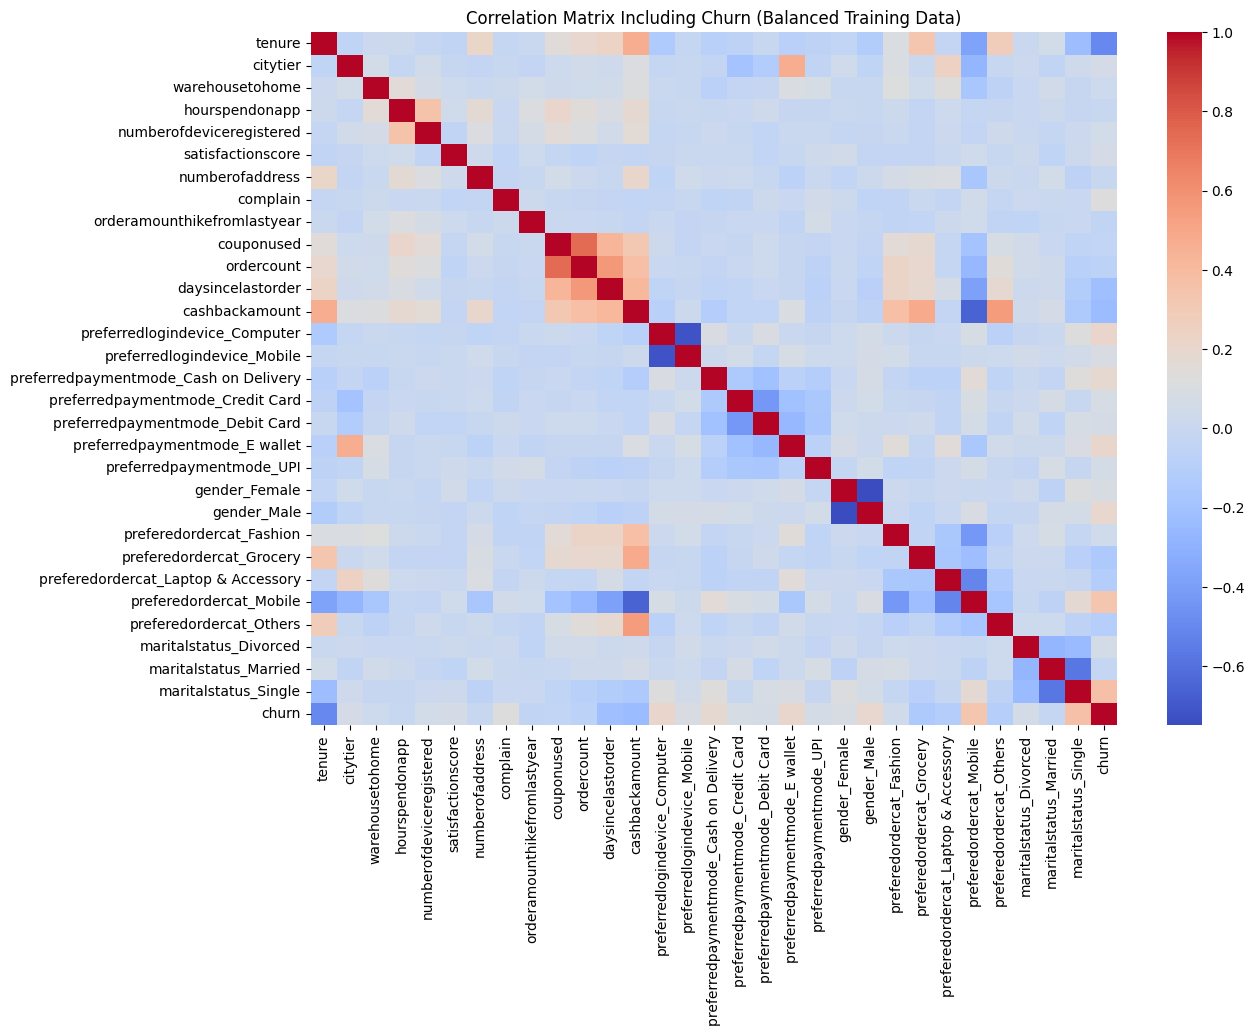

In [72]:
# Example of how to generate and visualize a correlation matrix
plt.figure(figsize=(12, 8)) # Adjust figure size as needed
# Calculate the correlation matrix - use X_train_bal for correlations on balanced data
correlation_matrix = X_train_bal.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f") # annot=True to show values
plt.title("Correlation Matrix of Features (Balanced Training Data)")
plt.show()


train_bal_combined = pd.concat([X_train_bal, y_train_bal.rename('churn')], axis=1)

# Now calculate the correlation matrix of this combined dataframe
correlation_matrix_with_churn = train_bal_combined.corr()

# Print the correlations with the target variable 'churn' - this is the 'churn' column from the matrix
target_correlation = correlation_matrix_with_churn['churn'].sort_values(ascending=False)
print("\nCorrelation with Churn (Balanced Training Data):\n", target_correlation)

# Display the heatmap of the correlation matrix including the target variable
plt.figure(figsize=(13, 9)) # Adjust figure size if needed
sns.heatmap(correlation_matrix_with_churn, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Including Churn (Balanced Training Data)")
plt.show()


# Summary of Correlation Analysis with Churn

The correlation matrix (specifically the 'churn' column/row) reveals the linear relationship between each feature and the likelihood of churn.

*   **Strongest Negative Linear Relationship:** `tenure` (-0.503) - Longer tenure is linearly associated with lower churn risk.
*   **Strongest Positive Linear Relationship:** `maritalstatus_Single` (0.368) - Being single shows a linear association with higher churn risk.
*   **Other Notable Linear Relationships:**
    *   Positive: `preferedordercat_Mobile`, `preferredlogindevice_Computer`, `preferredpaymentmode_E wallet`, `gender_Male`, `preferredpaymentmode_Cash on Delivery`, `complain`.
    *   Negative: `cashbackamount`, `daysincelastorder` (note: this appears counter-intuitive for linear correlation but SHAP suggests positive importance), `preferedordercat` categories other than Mobile.
*   **Weak Linear Relationships:** Many features show correlations close to 0, suggesting weak linear associations, though they may still be important in non-linear ways (as indicated by SHAP).

While correlation highlights linear trends and potential multicollinearity, SHAP values provide a more accurate measure of feature importance for complex, non-linear models like XGBoost, reflecting how features actually influence the model's predictions, including interactions and non-linear effects.

##Feature Ranking using SHAP values

Feature Importance Ranking (Mean Absolute SHAP Value):
tenure                                   2.233748
maritalstatus_Single                     1.627966
preferredlogindevice_Computer            0.975010
complain                                 0.840923
maritalstatus_Married                    0.804173
numberofaddress                          0.704111
preferredpaymentmode_E wallet            0.643939
preferedordercat_Mobile                  0.631447
gender_Male                              0.611528
cashbackamount                           0.554728
gender_Female                            0.535024
daysincelastorder                        0.532596
warehousetohome                          0.500924
preferredlogindevice_Mobile              0.490528
preferredpaymentmode_Debit Card          0.456337
couponused                               0.401937
preferredpaymentmode_Credit Card         0.374279
satisfactionscore                        0.346195
preferredpaymentmode_Cash on Delivery    0.33

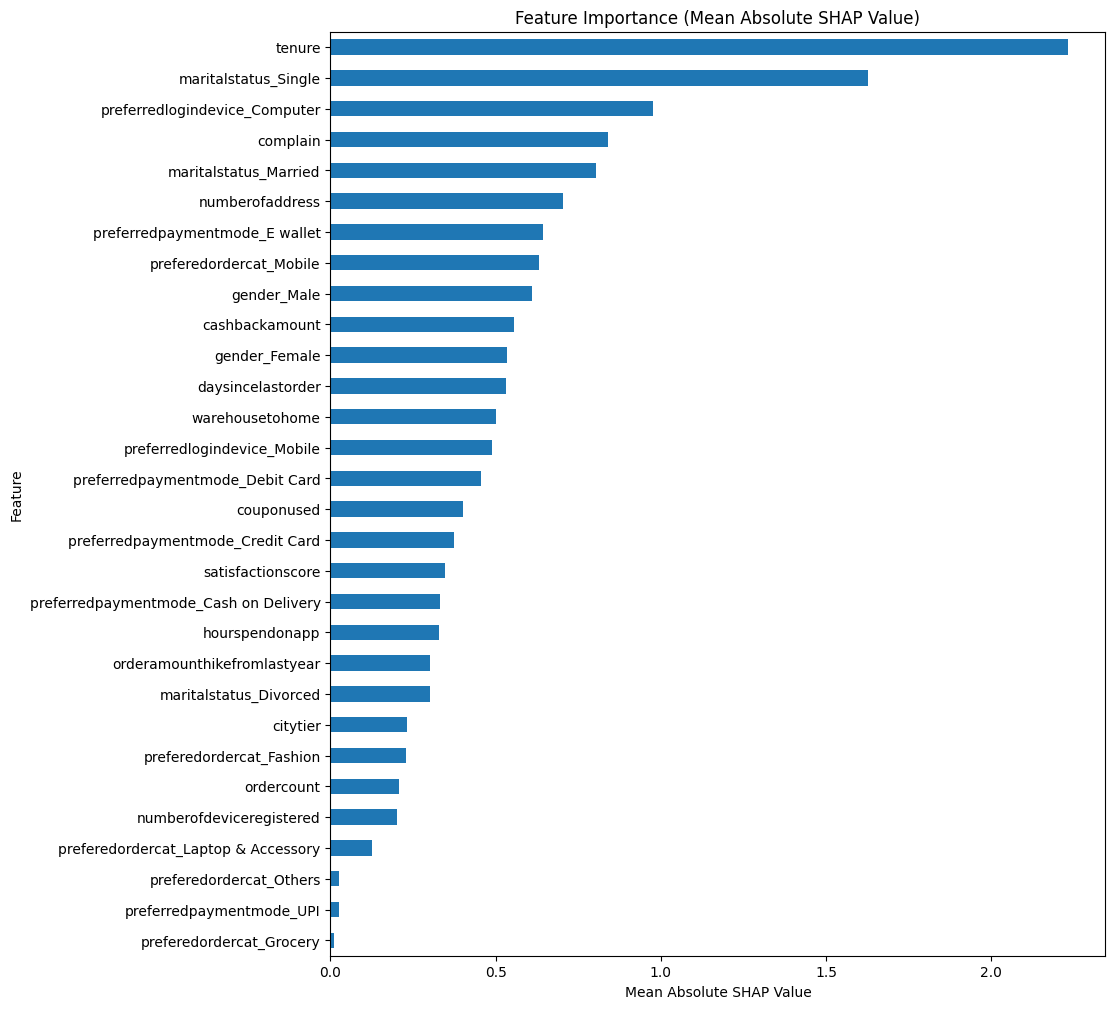

In [73]:
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# Create a Pandas Series for easier handling and sorting
feature_names = X_train_bal.columns # Get feature names from your DataFrame
shap_importance = pd.Series(mean_abs_shap_values, index=feature_names)

# Sort the features by importance
shap_importance_sorted = shap_importance.sort_values(ascending=False)

# Print the ranking
print("Feature Importance Ranking (Mean Absolute SHAP Value):")
print(shap_importance_sorted)

# Optionally, visualize this ranking as a bar plot
plt.figure(figsize=(10, len(shap_importance_sorted) * 0.4)) # Adjust figure size dynamically
shap_importance_sorted.plot(kind='barh')
plt.title("Feature Importance (Mean Absolute SHAP Value)")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis() # Invert y-axis to have the most important feature at the top
plt.show()

##Using LIME explaination

In [75]:
from lime import lime_tabular
import numpy as np
import pandas as pd
# We'll also import time to track progress as this can still take a moment
import time
from IPython.display import display # To display explanations in notebook


# Make sure X_test columns match X_train_bal columns as before
if not list(X_test.columns) == list(X_train_bal.columns):
    print("Warning: X_test columns do not match X_train_bal columns. Attempting reindex.")
    X_test = X_test.reindex(columns=X_train_bal.columns, fill_value=0)
    print("X_test columns reindexed.")

X_test_np = X_test.values # Convert to numpy for LIME
feature_names = list(X_test.columns) # Get feature names for LIME
class_names = ['No Churn', 'Churn'] # Define class names for LIME

# --- FIX: Instantiate LIME explainer here ---
# Use the balanced training data (X_train_bal) for LIME training_data
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=X_train_bal.values,
                                              feature_names=feature_names,
                                              class_names=class_names,
                                              mode='classification')


# List to store all the LIME explanations
all_lime_explanations = []

print(f"Generating LIME explanations for {X_test.shape[0]} instances in the test set...")
start_time = time.time()

# Iterate through each instance in the test set
for i in range(X_test.shape[0]):
    instance_to_explain = X_test_np[i]

    # Get the predicted label for the instance (using the model trained previously)
    predicted_label = model.predict(X_test.iloc[[i]])[0] # Use the actual model object

    # --- FIX: Use the LIME explainer object and its explain_instance method ---
    explanation = lime_explainer.explain_instance(data_row=instance_to_explain,
                                             predict_fn=model.predict_proba, # Use the model's predict_proba method
                                             num_features=10,
                                             top_labels=1)

    # Store the explanation (you might want to store the list of tuples, not the explainer object itself)
    # Specify the label explicitly to get the explanation for the predicted class
    all_lime_explanations.append(explanation.as_list(label=predicted_label))

    # Optional: Print progress every N instances
    if (i + 1) % 100 == 0:
        print(f"Processed {i + 1}/{X_test.shape[0]} instances...")

end_time = time.time()
print(f"Finished generating explanations in {end_time - start_time:.2f} seconds.")
print(f"Stored {len(all_lime_explanations)} explanations.")

# The rest of the code to process and display LIME explanations remains the same

flat_explanations_list = []
for i, explanation_list in enumerate(all_lime_explanations):
    # Get the predicted label for this instance (assuming you stored it or can get it again)
    # For simplicity, let's just use the index for now, but you might want to add the actual index/ID and predicted label
    explanation_dict = {'instance_index': i}
    for feature, weight in explanation_list:
        explanation_dict[feature] = weight # Store the weight for this feature

    flat_explanations_list.append(explanation_dict)

# Convert the list of dictionaries to a DataFrame
lime_explanations_df = pd.DataFrame(flat_explanations_list)

# Fill any missing values (features not present in a specific local explanation) with 0
lime_explanations_df = lime_explanations_df.fillna(0)

print("\nDataFrame of LIME explanations:")
print(lime_explanations_df.head())

Generating LIME explanations for 1126 instances in the test set...
Processed 100/1126 instances...
Processed 200/1126 instances...
Processed 300/1126 instances...
Processed 400/1126 instances...
Processed 500/1126 instances...
Processed 600/1126 instances...
Processed 700/1126 instances...
Processed 800/1126 instances...
Processed 900/1126 instances...
Processed 1000/1126 instances...
Processed 1100/1126 instances...
Finished generating explanations in 206.14 seconds.
Stored 1126 explanations.

DataFrame of LIME explanations:
   instance_index  tenure > 12.00  maritalstatus_Single <= 0.00  \
0               0        0.356600                      0.280982   
1               1        0.339299                      0.262203   
2               2        0.000000                      0.000000   
3               3        0.339738                      0.000000   
4               4        0.000000                      0.290951   

   preferredpaymentmode_E wallet <= 0.00  \
0                    

In [76]:
if not list(X_test.columns) == list(X_train_bal.columns):
    print("Warning: X_test columns do not match X_train_bal columns. This can cause LIME errors.")
    # Attempt to reindex X_test to match X_train_bal columns
    # This assumes all columns in X_train_bal exist in X_test (which should be true after get_dummies)
    X_test = X_test.reindex(columns=X_train_bal.columns, fill_value=0)
    print("X_test columns reindexed to match X_train_bal.")


# Convert X_test to numpy array for LIME (LIME often works better with numpy arrays)
X_test_np = X_test.values
feature_names = list(X_test.columns) # Get feature names from DataFrame columns

# Get the class names (0 and 1 for churn)
class_names = ['No Churn', 'Churn'] # Adjust if your classes are named differently

explainer = lime_tabular.LimeTabularExplainer(training_data=X_train_bal.values,
                                              feature_names=feature_names,
                                              class_names=class_names,
                                              mode='classification')

# Choose an instance from the test set to explain
# Let's pick the first instance in the test set (you can pick any index)
instance_idx = 0
instance_to_explain = X_test_np[instance_idx]


prediction_proba = model.predict_proba(X_test.iloc[[instance_idx]]) # Pass as a DataFrame/Series or reshape np array
print(f"Model prediction probabilities for instance {instance_idx}: {prediction_proba}")
print(f"Predicted class for instance {instance_idx}: {model.predict(X_test.iloc[[instance_idx]])[0]}") # Get the predicted class


lime_explanation = explainer.explain_instance(data_row=instance_to_explain,
                                               predict_fn=model.predict_proba,
                                               num_features=10, # Show top 10 important features for this instance
                                               top_labels=1)


print(f"\nLIME Explanation for Instance {instance_idx}:")
lime_explanation.show_in_notebook(show_table=True, show_all=False) # show_all=False limits the table to explained features

# You can also print the explanation as a list of (feature, weight) tuples
print("\nExplanation as list of (feature, weight) tuples:")
print(lime_explanation.as_list(label=model.predict(X_test.iloc[[instance_idx]])[0])) # Get explanation for the predicted label


Model prediction probabilities for instance 0: [[0.9938596  0.00614043]]
Predicted class for instance 0: 0

LIME Explanation for Instance 0:



Explanation as list of (feature, weight) tuples:
[('tenure > 12.00', 0.34121573574369307), ('maritalstatus_Single <= 0.00', 0.27854263321655226), ('preferredpaymentmode_E wallet <= 0.00', 0.19592320288471737), ('0.00 < maritalstatus_Married <= 1.00', -0.12927133932057852), ('gender_Female <= 0.00', 0.11047387858307374), ('0.00 < gender_Male <= 1.00', -0.10918639974707091), ('preferedordercat_Mobile <= 0.00', 0.09528658410530891), ('preferedordercat_Fashion <= 0.00', 0.08037216803107211), ('maritalstatus_Divorced <= 0.00', 0.08019024230465996), ('0.00 < preferredpaymentmode_Debit Card <= 1.00', -0.07478660845826014)]


##Explainable AI

Calculating Permutation Importance for XGBClassifier using 'f1'...
Calculation finished in 11.66 seconds.

Permutation Importance Ranking:
tenure                                   0.488600
complain                                 0.207319
maritalstatus_Single                     0.197902
numberofaddress                          0.145166
cashbackamount                           0.135231
maritalstatus_Married                    0.103162
warehousetohome                          0.103087
daysincelastorder                        0.092630
satisfactionscore                        0.068277
orderamounthikefromlastyear              0.054541
preferredlogindevice_Computer            0.052758
preferredpaymentmode_Cash on Delivery    0.039372
preferedordercat_Mobile                  0.037655
preferredpaymentmode_E wallet            0.037575
gender_Male                              0.035494
numberofdeviceregistered                 0.033185
preferredlogindevice_Mobile              0.026734
preferredpa

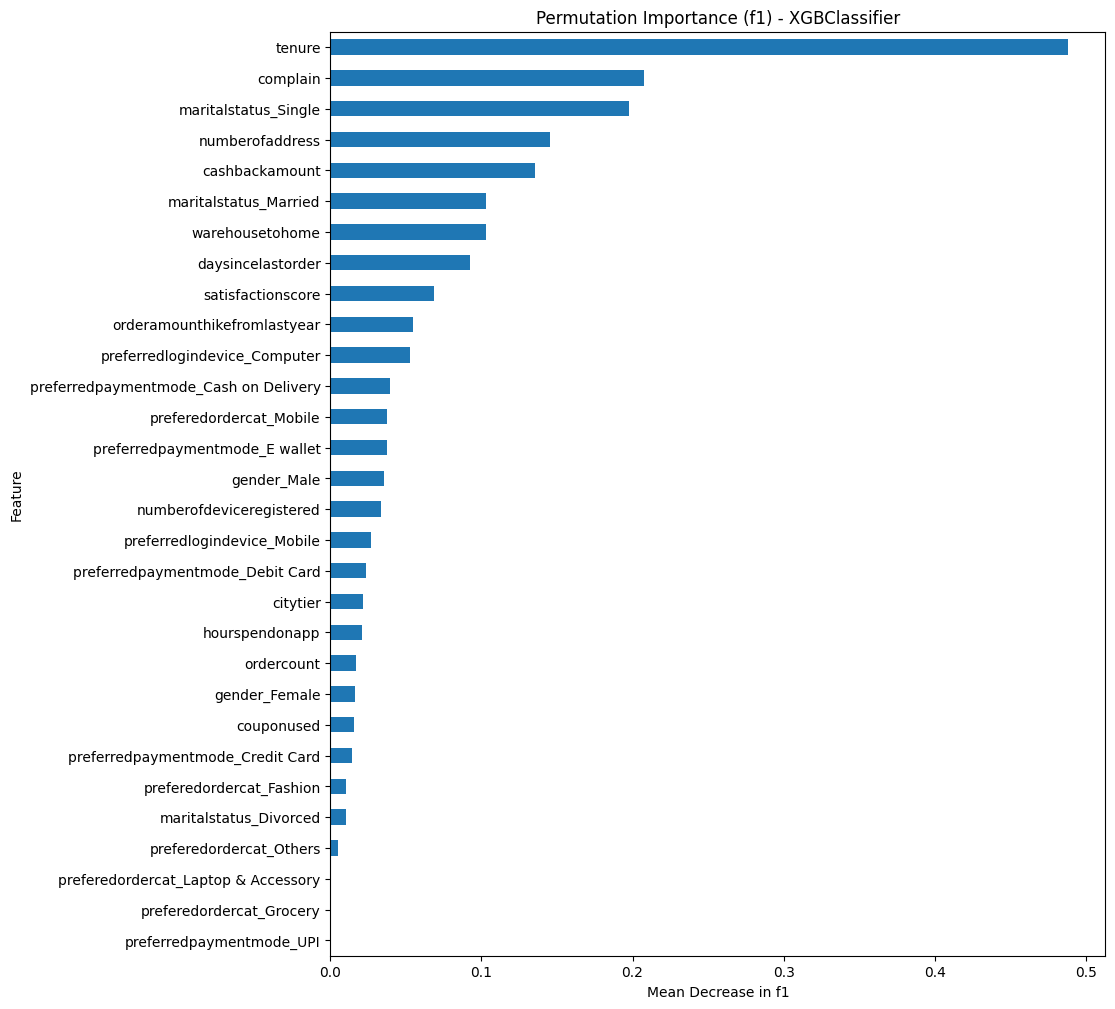

In [77]:
scoring_metric = 'f1'

print(f"Calculating Permutation Importance for {model.__class__.__name__} using '{scoring_metric}'...")
start_time = time.time()

result = permutation_importance(
    model,
    X_test,
    y_test,
    scoring=scoring_metric,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

end_time = time.time()
print(f"Calculation finished in {end_time - start_time:.2f} seconds.")

perm_importance_mean = pd.Series(result.importances_mean, index=X_test.columns)
perm_importance_std = pd.Series(result.importances_std, index=X_test.columns)

perm_importance_sorted = perm_importance_mean.sort_values(ascending=False)

print("\nPermutation Importance Ranking:")
print(perm_importance_sorted)


plt.figure(figsize=(10, len(perm_importance_sorted) * 0.4))
perm_importance_sorted.plot(kind='barh')
plt.title(f"Permutation Importance ({scoring_metric}) - {model.__class__.__name__}")
plt.xlabel(f"Mean Decrease in {scoring_metric}")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


##Feature Engineering

In [78]:

import re

def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = col.strip()
        new_col = re.sub(r'\s+', '_', new_col)
        # LightGBM specifically warns about [] and <, replace them too if they exist
        new_col = re.sub(r'\[|\]|<', '', new_col)
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Assuming X_train_bal, y_train_bal, X_test, y_test are already created after SMOTE

# Apply the cleaning function to both balanced training features and test features
X_train_bal = clean_col_names(X_train_bal)
X_test = clean_col_names(X_test)

print("Column names cleaned for both X_train_bal and X_test.")
print("X_train_bal columns:", X_train_bal.columns.tolist())
print("X_test columns:", X_test.columns.tolist())

# Verify column sets are identical
if set(X_train_bal.columns) == set(X_test.columns):
    print("\nColumn sets match between X_train_bal and X_test.")
else:
    print("\nWarning: Column sets do NOT match between X_train_bal and X_test. Investigate column generation/cleaning.")


Column names cleaned for both X_train_bal and X_test.
X_train_bal columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'couponused', 'ordercount', 'daysincelastorder', 'cashbackamount', 'preferredlogindevice_Computer', 'preferredlogindevice_Mobile', 'preferredpaymentmode_Cash_on_Delivery', 'preferredpaymentmode_Credit_Card', 'preferredpaymentmode_Debit_Card', 'preferredpaymentmode_E_wallet', 'preferredpaymentmode_UPI', 'gender_Female', 'gender_Male', 'preferedordercat_Fashion', 'preferedordercat_Grocery', 'preferedordercat_Laptop_&_Accessory', 'preferedordercat_Mobile', 'preferedordercat_Others', 'maritalstatus_Divorced', 'maritalstatus_Married', 'maritalstatus_Single']
X_test columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'coupon

In [79]:
print("Checking column consistency BEFORE feature selection:")
print("X_train_bal columns:", X_train_bal.columns.tolist())
print("X_test columns:", X_test.columns.tolist())

if not X_test.columns.equals(X_train_bal.columns):
    print("\nColumns are not identical. Reindexing X_test to match X_train_bal columns.")
    X_test = X_test.reindex(columns=X_train_bal.columns, fill_value=0)
    print("X_test columns reindexed.")

# Verify again after reindexing
if X_test.columns.equals(X_train_bal.columns):
     print("Column order and names now match between X_train_bal and X_test.")
     print("X_train_bal columns:", X_train_bal.columns.tolist())
     print("X_test columns:", X_test.columns.tolist())
else:
     print("\nFATAL ERROR: Column sets still do NOT match after reindexing. Investigate preprocessing steps.")


Checking column consistency BEFORE feature selection:
X_train_bal columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'couponused', 'ordercount', 'daysincelastorder', 'cashbackamount', 'preferredlogindevice_Computer', 'preferredlogindevice_Mobile', 'preferredpaymentmode_Cash_on_Delivery', 'preferredpaymentmode_Credit_Card', 'preferredpaymentmode_Debit_Card', 'preferredpaymentmode_E_wallet', 'preferredpaymentmode_UPI', 'gender_Female', 'gender_Male', 'preferedordercat_Fashion', 'preferedordercat_Grocery', 'preferedordercat_Laptop_&_Accessory', 'preferedordercat_Mobile', 'preferedordercat_Others', 'maritalstatus_Divorced', 'maritalstatus_Married', 'maritalstatus_Single']
X_test columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'coupon

In [80]:
feature_ranking = shap_importance_sorted # Replace with perm_importance_sorted if you prefer

# Decide on the number of top features to select (e.g., top 15, top 20)
n_top_features = 20

# Get the names of the top features
top_features = feature_ranking.head(n_top_features).index.tolist()

print(f"\nSelected {n_top_features} top features based on ranking:")
print(top_features)



Selected 20 top features based on ranking:
['tenure', 'maritalstatus_Single', 'preferredlogindevice_Computer', 'complain', 'maritalstatus_Married', 'numberofaddress', 'preferredpaymentmode_E wallet', 'preferedordercat_Mobile', 'gender_Male', 'cashbackamount', 'gender_Female', 'daysincelastorder', 'warehousetohome', 'preferredlogindevice_Mobile', 'preferredpaymentmode_Debit Card', 'couponused', 'preferredpaymentmode_Credit Card', 'satisfactionscore', 'preferredpaymentmode_Cash on Delivery', 'hourspendonapp']


###MODEL TRAINING

*   Gradient Boosting Machine
*   LightGBM
*   XGBoost




Column names cleaned for both X_train_bal and X_test.
X_train_bal columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'couponused', 'ordercount', 'daysincelastorder', 'cashbackamount', 'preferredlogindevice_Computer', 'preferredlogindevice_Mobile', 'preferredpaymentmode_Cash_on_Delivery', 'preferredpaymentmode_Credit_Card', 'preferredpaymentmode_Debit_Card', 'preferredpaymentmode_E_wallet', 'preferredpaymentmode_UPI', 'gender_Female', 'gender_Male', 'preferedordercat_Fashion', 'preferedordercat_Grocery', 'preferedordercat_Laptop_&_Accessory', 'preferedordercat_Mobile', 'preferedordercat_Others', 'maritalstatus_Divorced', 'maritalstatus_Married', 'maritalstatus_Single']
X_test columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'coupon

100%|===================| 7456/7492 [00:54<00:00]       


Feature Importance Ranking (Mean Absolute SHAP Value) - based on cleaned columns:
tenure                                   2.233748
maritalstatus_Single                     1.627966
preferredlogindevice_Computer            0.975010
complain                                 0.840923
maritalstatus_Married                    0.804173
numberofaddress                          0.704111
preferredpaymentmode_E_wallet            0.643939
preferedordercat_Mobile                  0.631447
gender_Male                              0.611528
cashbackamount                           0.554728
gender_Female                            0.535024
daysincelastorder                        0.532596
warehousetohome                          0.500924
preferredlogindevice_Mobile              0.490528
preferredpaymentmode_Debit_Card          0.456337
couponused                               0.401937
preferredpaymentmode_Credit_Card         0.374279
satisfactionscore                        0.346195
preferredpaymentm

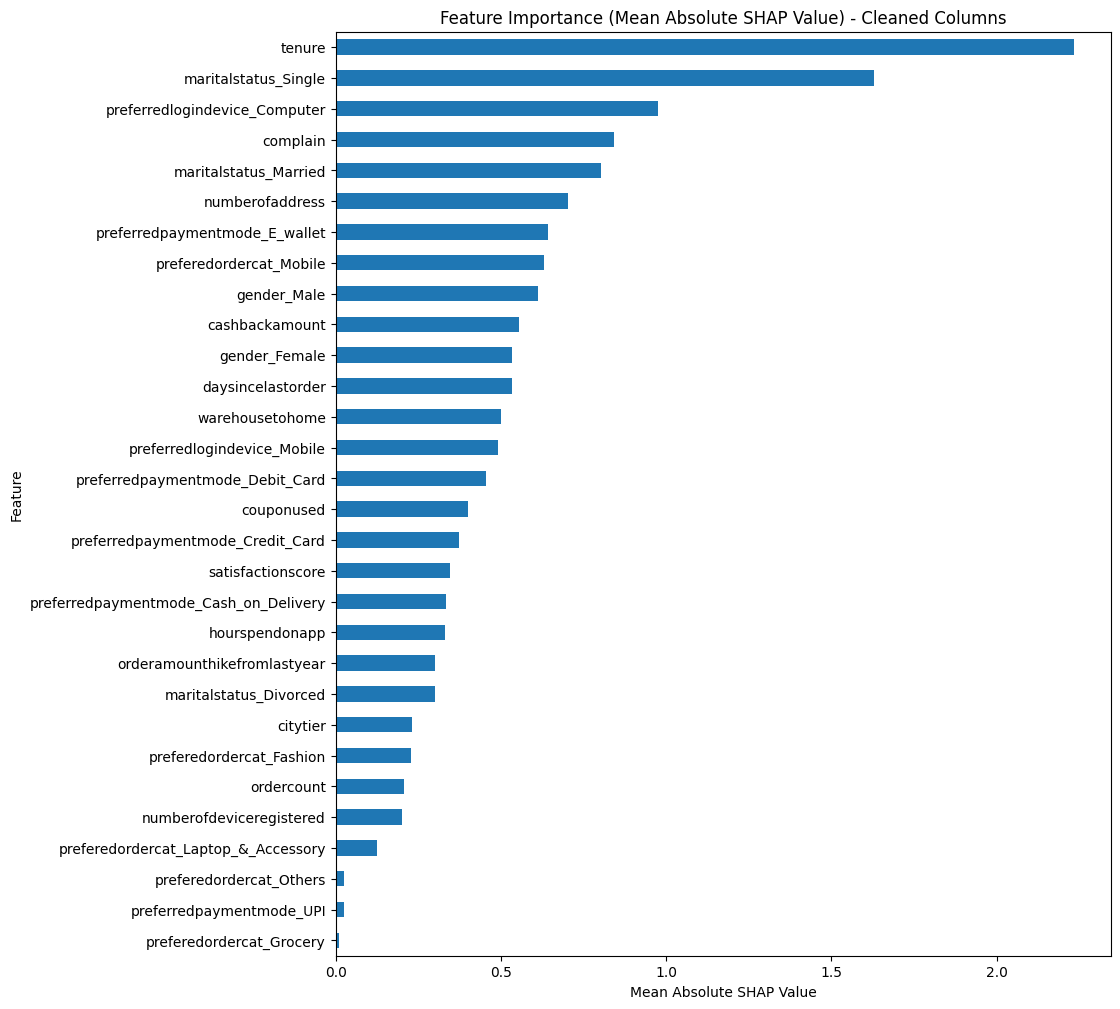


Selected 20 top features based on ranking (from cleaned columns):
['tenure', 'maritalstatus_Single', 'preferredlogindevice_Computer', 'complain', 'maritalstatus_Married', 'numberofaddress', 'preferredpaymentmode_E_wallet', 'preferedordercat_Mobile', 'gender_Male', 'cashbackamount', 'gender_Female', 'daysincelastorder', 'warehousetohome', 'preferredlogindevice_Mobile', 'preferredpaymentmode_Debit_Card', 'couponused', 'preferredpaymentmode_Credit_Card', 'satisfactionscore', 'preferredpaymentmode_Cash_on_Delivery', 'hourspendonapp']


In [81]:
print("Column names cleaned for both X_train_bal and X_test.")
print("X_train_bal columns:", X_train_bal.columns.tolist())
print("X_test columns:", X_test.columns.tolist())

# Verify column sets are identical (important for consistency)
if set(X_train_bal.columns) == set(X_test.columns):
    print("\nColumn sets match between X_train_bal and X_test.")
else:
    print("\nWarning: Column sets do NOT match between X_train_bal and X_test. Investigate column generation/cleaning.")
    # Reindex X_test to match X_train_bal columns if they don't match
    if not X_test.columns.equals(X_train_bal.columns):
        print("Attempting to reindex X_test to match X_train_bal columns.")
        X_test = X_test.reindex(columns=X_train_bal.columns, fill_value=0)
        print("X_test columns reindexed.")
        if X_test.columns.equals(X_train_bal.columns):
            print("Column order and names now match between X_train_bal and X_test.")
        else:
             print("\nFATAL ERROR: Column sets still do NOT match after reindexing. Investigate preprocessing steps.")

print("\nRetraining XGBoost for SHAP calculation on cleaned columns...")
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_bal, y_train_bal) # Fit on the CLEANED data

# Calculate SHAP values with the model trained on cleaned data
import shap
print("Calculating SHAP values on cleaned training data...")
explainer = shap.Explainer(model, X_train_bal)
shap_values = explainer(X_train_bal)

mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# Create a Pandas Series for easier handling and sorting
feature_names = X_train_bal.columns # Get feature names from the CLEANED DataFrame
shap_importance = pd.Series(mean_abs_shap_values, index=feature_names)

# Sort the features by importance
shap_importance_sorted = shap_importance.sort_values(ascending=False)

# Print the ranking (Optional)
print("\nFeature Importance Ranking (Mean Absolute SHAP Value) - based on cleaned columns:")
print(shap_importance_sorted)

# Optionally, visualize this ranking as a bar plot
plt.figure(figsize=(10, len(shap_importance_sorted) * 0.4)) # Adjust figure size dynamically
shap_importance_sorted.plot(kind='barh')
plt.title("Feature Importance (Mean Absolute SHAP Value) - Cleaned Columns")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis() # Invert y-axis to have the most important feature at the top
plt.show()


# --- Now proceed with feature selection using the corrected ranking ---
feature_ranking = shap_importance_sorted # Use the ranking based on cleaned columns

# Decide on the number of top features to select (e.g., top 15, top 20)
n_top_features = 20

# Get the names of the top features (these names are now from the cleaned DataFrame)
top_features = feature_ranking.head(n_top_features).index.tolist()

print(f"\nSelected {n_top_features} top features based on ranking (from cleaned columns):")
print(top_features)

In [82]:

# Initialize the models you want to retrain on the selected features
selected_feature_models = [

    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
     # Ensemble Methods
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42),

    # Gradient Boosting Libraries
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), # Ensure compatibility and metric
    LGBMClassifier(random_state=42),

]

In [83]:
# Dictionary to store results for models trained on selected features
selected_model_results = {}

# --- Training and Evaluation Loop with Selected Features ---
X_train_bal_selected_rank = X_train_bal[top_features]
X_test_selected_rank = X_test[top_features]

print("\n--- Starting model training and evaluation with SELECTED FEATURES ---")
for model in selected_feature_models:
    model_name = model.__class__.__name__
    print(f"\n--- Training {model_name} on selected features ---")

    try:
        # Train the model on the balanced training data with SELECTED FEATURES
        start_time = time.time()
        model.fit(X_train_bal_selected_rank, y_train_bal)
        end_time = time.time()
        print(f"Training time (selected features): {end_time - start_time:.2f} seconds")

        # Make predictions on the test set with SELECTED FEATURES
        y_pred = model.predict(X_test_selected_rank)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        selected_model_results[model_name] = {
            'Accuracy (Selected)': accuracy,
            'Precision (Selected)': precision,
            'Recall (Selected)': recall,
            'F1 Score (Selected)': f1
        }

        print(f"  Accuracy (Selected): {accuracy:.4f}")
        print(f"  Precision (Selected): {precision:.4f}")
        print(f"  Recall (Selected): {recall:.4f}")
        print(f"  F1 Score (Selected): {f1:.4f}")

    except Exception as e:
        print(f"  Error training/evaluating {model_name} on selected features: {e}")
        selected_model_results[model_name] = {'Error': str(e)}



--- Starting model training and evaluation with SELECTED FEATURES ---

--- Training RandomForestClassifier on selected features ---
Training time (selected features): 0.99 seconds
  Accuracy (Selected): 0.9769
  Precision (Selected): 0.9659
  Recall (Selected): 0.8947
  F1 Score (Selected): 0.9290

--- Training GradientBoostingClassifier on selected features ---
Training time (selected features): 1.65 seconds
  Accuracy (Selected): 0.8970
  Precision (Selected): 0.6869
  Recall (Selected): 0.7158
  F1 Score (Selected): 0.7010

--- Training AdaBoostClassifier on selected features ---
Training time (selected features): 0.44 seconds
  Accuracy (Selected): 0.8739
  Precision (Selected): 0.6062
  Recall (Selected): 0.7211
  F1 Score (Selected): 0.6587

--- Training BaggingClassifier on selected features ---
Training time (selected features): 0.32 seconds
  Accuracy (Selected): 0.9565
  Precision (Selected): 0.8983
  Recall (Selected): 0.8368
  F1 Score (Selected): 0.8665

--- Training XGBC


--- Starting model training and evaluation with SELECTED FEATURES ---

--- Training RandomForestClassifier on selected features ---
Training time (selected features): 1.01 seconds
  Accuracy (Selected): 0.9769
  Precision (Selected): 0.9659
  Recall (Selected): 0.8947
  F1 Score (Selected): 0.9290

--- Training GradientBoostingClassifier on selected features ---
Training time (selected features): 1.63 seconds
  Accuracy (Selected): 0.8970
  Precision (Selected): 0.6869
  Recall (Selected): 0.7158
  F1 Score (Selected): 0.7010

--- Training AdaBoostClassifier on selected features ---
Training time (selected features): 0.44 seconds
  Accuracy (Selected): 0.8739
  Precision (Selected): 0.6062
  Recall (Selected): 0.7211
  F1 Score (Selected): 0.6587

--- Training BaggingClassifier on selected features ---
Training time (selected features): 0.35 seconds
  Accuracy (Selected): 0.9565
  Precision (Selected): 0.8983
  Recall (Selected): 0.8368
  F1 Score (Selected): 0.8665

--- Training XGBC


--- Confusion Matrices (Selected Features) ---


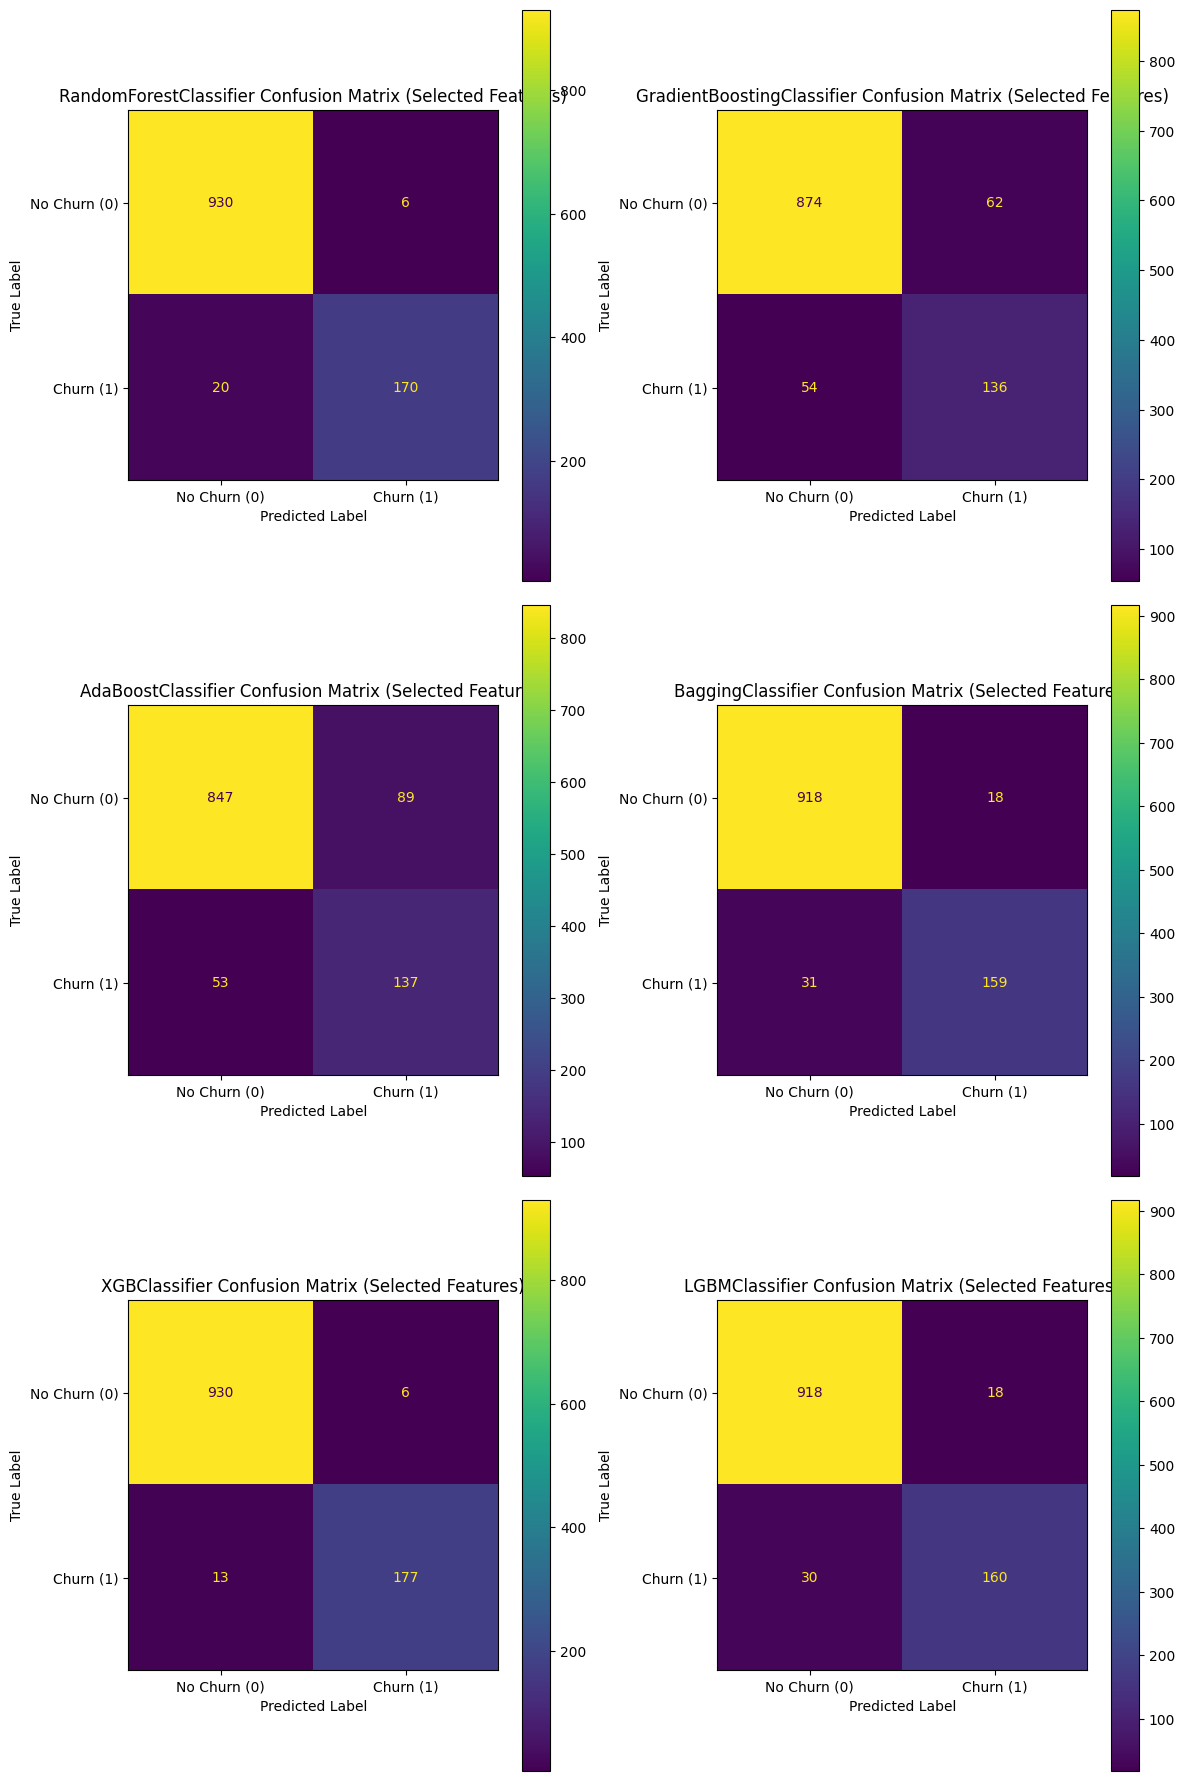

In [84]:
# Dictionary to store results for models trained on selected features
selected_model_results = {}

# Dictionary to store confusion matrices for plotting later
selected_model_confusion_matrices = {}


# --- Training and Evaluation Loop with Selected Features ---
# Ensure X_train_bal and X_test have the same columns as top_features expects
if not X_test.columns.equals(X_train_bal.columns):
     print("\nColumns do not match, reindexing X_test before selecting features...")
     X_test = X_test.reindex(columns=X_train_bal.columns, fill_value=0)


# Select the top features for training
X_train_bal_selected_rank = X_train_bal[top_features]
X_test_selected_rank = X_test[top_features]

print("\n--- Starting model training and evaluation with SELECTED FEATURES ---")
for model in selected_feature_models:
    model_name = model.__class__.__name__
    print(f"\n--- Training {model_name} on selected features ---")

    try:
        # Train the model on the balanced training data with SELECTED FEATURES
        start_time = time.time()
        model.fit(X_train_bal_selected_rank, y_train_bal)
        end_time = time.time()
        print(f"Training time (selected features): {end_time - start_time:.2f} seconds")

        # Make predictions on the test set with SELECTED FEATURES
        y_pred = model.predict(X_test_selected_rank)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        selected_model_results[model_name] = {
            'Accuracy (Selected)': accuracy,
            'Precision (Selected)': precision,
            'Recall (Selected)': recall,
            'F1 Score (Selected)': f1
        }

        print(f"  Accuracy (Selected): {accuracy:.4f}")
        print(f"  Precision (Selected): {precision:.4f}")
        print(f"  Recall (Selected): {recall:.4f}")
        print(f"  F1 Score (Selected): {f1:.4f}")

        # --- Store Confusion Matrix ---
        cm = confusion_matrix(y_test, y_pred)
        selected_model_confusion_matrices[model_name] = cm


    except Exception as e:
        print(f"  Error training/evaluating {model_name} on selected features: {e}")
        selected_model_results[model_name] = {'Error': str(e)}

# --- Display Results Table ---
print("\n--- Model Evaluation Summary (Selected Features) ---")
# Convert results dictionary to DataFrame
selected_model_results_df = pd.DataFrame(selected_model_results).T # Transpose for models as rows

# Sort by F1 Score (or other preferred metric)
selected_model_results_df_sorted = selected_model_results_df.sort_values(by='F1 Score (Selected)', ascending=False)

print(selected_model_results_df_sorted)

# Optional: Style the DataFrame for better visualization in notebook
metrics_styled_selected = selected_model_results_df_sorted.style.background_gradient(
    subset=['Accuracy (Selected)', 'F1 Score (Selected)'], cmap='summer'
)
display(metrics_styled_selected)


# --- Display Confusion Matrices ---
print("\n--- Confusion Matrices (Selected Features) ---")

# Determine the layout for subplots (e.g., 2 columns)
n_models = len(selected_model_confusion_matrices)
n_cols = 2
n_rows = (n_models + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(n_cols * 6, n_rows * 6)) # Adjust figure size as needed

for i, (model_name, cm) in enumerate(selected_model_confusion_matrices.items()):
    plt.subplot(n_rows, n_cols, i + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn (0)', 'Churn (1)'])
    disp.plot(ax=plt.gca()) # Use the current subplot axes
    plt.title(f"{model_name} Confusion Matrix (Selected Features)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")


plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

##The other models (LSTM, GRU Networks, Random Survival Forest)

In [85]:
print("Checking data types in X_train_bal before reshaping:")
print(X_train_bal.dtypes.value_counts())

print("\nChecking data types in X_test before reshaping:")
print(X_test.dtypes.value_counts())

Checking data types in X_train_bal before reshaping:
float64    30
Name: count, dtype: int64

Checking data types in X_test before reshaping:
bool       17
float64     8
int64       5
Name: count, dtype: int64


In [86]:
if not X_test.columns.equals(X_train_bal.columns):
     print("\nColumns do not match, reindexing X_test...")
     X_test = X_test.reindex(columns=X_train_bal.columns, fill_value=0)

print(f"\nSelecting {len(top_features)} top features for RNN models...")

X_train_bal_rnn_selected = X_train_bal[top_features]
X_test_rnn_selected = X_test[top_features]

print(f"Shape of X_train_bal_rnn_selected: {X_train_bal_rnn_selected.shape}")
print(f"Shape of X_test_rnn_selected: {X_test_rnn_selected.shape}")


Selecting 20 top features for RNN models...
Shape of X_train_bal_rnn_selected: (7492, 20)
Shape of X_test_rnn_selected: (1126, 20)


In [87]:
X_train_bal_reshaped = X_train_bal_rnn_selected.values.reshape((X_train_bal_rnn_selected.shape[0], 1, X_train_bal_rnn_selected.shape[1]))
X_test_reshaped = X_test_rnn_selected.values.reshape((X_test_rnn_selected.shape[0], 1, X_test_rnn_selected.shape[1]))

print(f"Reshaped X_train_bal (selected features) shape for RNNs (1 time step): {X_train_bal_reshaped.shape}")
print(f"Reshaped X_test (selected features) shape for RNNs (1 time step): {X_test_reshaped.shape}")

Reshaped X_train_bal (selected features) shape for RNNs (1 time step): (7492, 1, 20)
Reshaped X_test (selected features) shape for RNNs (1 time step): (1126, 1, 20)


In [88]:
# Define the input shape for the RNN models based on selected features
n_features_selected = X_train_bal_rnn_selected.shape[1]
n_time_steps = 1 # Because each instance is a single observation point in time

# Define a simple LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    # Use the selected number of features
    model.add(LSTM(50, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define a simple GRU model
def build_gru_model(input_shape):
    model = Sequential()
    # Use the selected number of features
    model.add(GRU(50, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define input shape using the number of selected features
rnn_input_shape = (n_time_steps, n_features_selected)

# --- Training LSTM on Selected Features ---
print("\n--- Training LSTM Model on Selected Features ---")
try:
    lstm_model = build_lstm_model(rnn_input_shape)
    print("LSTM Model Summary:")
    lstm_model.summary()

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the LSTM model
    history_lstm = lstm_model.fit(X_train_bal_reshaped, y_train_bal,
                                  epochs=50, # You can adjust epochs
                                  batch_size=32, # You can adjust batch size
                                  validation_split=0.2, # Use a validation split from training data
                                  callbacks=[early_stopping],
                                  verbose=1) # Set verbose to 1 to see training progress

    print("\n--- Evaluating LSTM Model on Test Set (Selected Features) ---")
    loss_lstm, accuracy_lstm = lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
    print(f"LSTM Test Loss: {loss_lstm:.4f}")
    print(f"LSTM Test Accuracy: {accuracy_lstm:.4f}")

    # Get predictions for classification report and confusion matrix
    y_pred_lstm_proba = lstm_model.predict(X_test_reshaped)
    y_pred_lstm = (y_pred_lstm_proba > 0.5).astype("int32") # Convert probabilities to binary predictions

    print("\nLSTM Classification Report (Test Set):")
    print(classification_report(y_test, y_pred_lstm))

    print("\nLSTM Confusion Matrix (Test Set):")
    cm_lstm = confusion_matrix(y_test, y_pred_lstm)
    print(cm_lstm)
    disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=['No Churn', 'Churn'])
    disp_lstm.plot()
    plt.title("LSTM Confusion Matrix")
    plt.show()


except Exception as e:
    print(f"Error training or evaluating LSTM model: {e}")


--- Training LSTM Model on Selected Features ---
LSTM Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,251 (55.67 KB)

 Trainable params: 14,251 (55.67 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6291 - loss: 1.1608 - val_accuracy: 0.6738 - val_loss: 0.7552
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7633 - loss: 0.4981 - val_accuracy: 0.7498 - val_loss: 0.6511
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7946 - loss: 0.4489 - val_accuracy: 0.7919 - val_loss: 0.4816
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8176 - loss: 0.4349 - val_accuracy: 0.7518 - val_loss: 0.5733
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8238 - loss: 0.4098 - val_accuracy: 0.7932 - val_loss: 0.4606
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8315 - loss: 0.4034 - val_accuracy: 0.7932 - val_loss: 0.4618
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8317 - loss: 0.3908 - val_accuracy: 0.7358 - val_loss: 0.5873
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8336 - loss: 0.3819 - val_accuracy: 0.

In [89]:
# --- Training GRU on Selected Features ---
print("\n--- Training GRU Model on Selected Features ---")
try:
    gru_model = build_gru_model(rnn_input_shape)
    print("GRU Model Summary:")
    gru_model.summary()

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the GRU model
    history_gru = gru_model.fit(X_train_bal_reshaped, y_train_bal,
                                epochs=50, # You can adjust epochs
                                batch_size=32, # You can adjust batch size
                                validation_split=0.2, # Use a validation split from training data
                                callbacks=[early_stopping],
                                verbose=1) # Set verbose to 1 to see training progress

    print("\n--- Evaluating GRU Model on Test Set (Selected Features) ---")
    loss_gru, accuracy_gru = gru_model.evaluate(X_test_reshaped, y_test, verbose=0)
    print(f"GRU Test Loss: {loss_gru:.4f}")
    print(f"GRU Test Accuracy: {accuracy_gru:.4f}")

    # Get predictions for classification report and confusion matrix
    y_pred_gru_proba = gru_model.predict(X_test_reshaped)
    y_pred_gru = (y_pred_gru_proba > 0.5).astype("int32") # Convert probabilities to binary predictions

    print("\nGRU Classification Report (Test Set):")
    print(classification_report(y_test, y_pred_gru))

    print("\nGRU Confusion Matrix (Test Set):")
    cm_gru = confusion_matrix(y_test, y_pred_gru)
    print(cm_gru)
    disp_gru = ConfusionMatrixDisplay(confusion_matrix=cm_gru, display_labels=['No Churn', 'Churn'])
    disp_gru.plot()
    plt.title("GRU Confusion Matrix")
    plt.show()


except Exception as e:
    print(f"Error training or evaluating GRU model: {e}")


--- Training GRU Model on Selected Features ---
GRU Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5147 - loss: 3.7087 - val_accuracy: 0.7545 - val_loss: 0.9352
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7044 - loss: 0.7709 - val_accuracy: 0.7252 - val_loss: 0.6687
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7675 - loss: 0.5219 - val_accuracy: 0.6664 - val_loss: 0.7145
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7977 - loss: 0.4635 - val_accuracy: 0.6945 - val_loss: 0.6729
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8127 - loss: 0.4335 - val_accuracy: 0.6604 - val_loss: 0.7447
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8113 - loss: 0.4311 - val_accuracy: 0.7732 - val_loss: 0.4977
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8249 - loss: 0.4083 - val_accuracy: 0.7932 - val_loss: 0.4777
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8438 - loss: 0.3808 - val_accuracy: 0.

no survival data found so RSF not possible!

In [100]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


[Errno 2] No such file or directory: '/drive/MyDrive/Colab Notebooks'
/content
